In [33]:
import matplotlib.pyplot as plt 
import numpy as np 
import pathlib
import os
import PIL
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Reshape, Flatten, Dropout, MaxPooling2D, Conv2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam as LegacyAdam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

In [34]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    return img_array

In [35]:
def normalize_image(img_array):
    return img_array / 255.0

In [36]:
def augment_data(images, labels, batch_size):
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    datagen.fit(images)
    augmented_data = datagen.flow(images, labels, batch_size=batch_size)
    
    return augmented_data

In [37]:
def one_hot_encode_labels(labels, num_classes):
    return to_categorical(labels, num_classes=num_classes)

In [38]:
def balance_classes(features, labels):
    smote = SMOTE(random_state=42)
    features_resampled, labels_resampled = smote.fit_resample(features, labels)
    return features_resampled, labels_resampled

In [46]:
dataset_dir = pathlib.Path('/Users/admin/Downloads/DSGP/Equal_dataset 2/train')
img_height, img_width = 224, 224
batch_ize = 32

In [48]:
img_array = load_and_preprocess_image(image_path)
normalized_img = normalize_image(img_array)
normalized_img_batch = np.expand_dims(normalized_img, axis=0)
augmented_data = augment_data(np.expand_dims(normalized_img, axis=0), np.array([[0, 0, 1]]), batch_size=32)
augmented_image, augmented_label = augmented_data.next()
one_hot_label = one_hot_encode_labels([2], num_classes=3)

In [6]:
dataset_dir = pathlib.Path('/Users/admin/Downloads/DSGP/Equal_dataset 2/train')
img_height, img_width = 224,224
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 6600 files belonging to 3 classes.
Using 5280 files for training.


In [7]:
vali_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6600 files belonging to 3 classes.
Using 1320 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Over Ripe', 'Ripe', 'Unripe']


In [9]:
# early_stopping = EarlyStopping(
#     monitor='val_loss',  
#     patience=3,          
#     restore_best_weights=True,  
# )

In [10]:
# data_augmentation = keras.Sequential(
#     [
#         layers.experimental.preprocessing.RandomFlip("horizontal"),
#         layers.experimental.preprocessing.RandomRotation(0.1),
#         layers.experimental.preprocessing.RandomZoom(0.1),
#     ]
# )

In [11]:
efficientnet_model = Sequential()

pretrained_m =tf.keras.applications.EfficientNetB7(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=3,
    classifier_activation="softmax",
)
for layer in pretrained_m.layers:
    layer.trainable = False

efficientnet_model.add(data_augmentation)   
efficientnet_model.add(pretrained_m)
efficientnet_model.add(BatchNormalization())
efficientnet_model.add(GlobalAveragePooling2D())
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(128, activation='relu'))
efficientnet_model.add(Dropout(0.3))
efficientnet_model.add(Dense(3, activation='softmax'))

In [12]:
efficientnet_model.compile(optimizer=LegacyAdam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
history = efficientnet_model.fit(
    train_ds,
    epochs=6,   
    validation_data=vali_ds,  
    # callbacks=[early_stopping],    
)

Epoch 1/6


2024-02-06 04:38:53.786512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-02-06 04:38:54.635944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  1/165 [..............................] - ETA: 32:25 - loss: 1.0460 - accuracy: 0.4062

2024-02-06 04:38:59.068568: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  2/165 [..............................] - ETA: 1:31 - loss: 0.9269 - accuracy: 0.5312 

2024-02-06 04:38:59.624153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  3/165 [..............................] - ETA: 1:27 - loss: 0.8392 - accuracy: 0.6042

2024-02-06 04:39:00.143640: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  4/165 [..............................] - ETA: 1:25 - loss: 0.7488 - accuracy: 0.6641

2024-02-06 04:39:00.656434: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  5/165 [..............................] - ETA: 1:24 - loss: 0.6805 - accuracy: 0.6938

2024-02-06 04:39:01.168311: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  6/165 [>.............................] - ETA: 1:23 - loss: 0.6615 - accuracy: 0.7188

2024-02-06 04:39:01.683722: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  7/165 [>.............................] - ETA: 1:22 - loss: 0.6471 - accuracy: 0.7232

2024-02-06 04:39:02.198799: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  8/165 [>.............................] - ETA: 1:21 - loss: 0.6681 - accuracy: 0.7266

2024-02-06 04:39:02.708608: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  9/165 [>.............................] - ETA: 1:21 - loss: 0.6547 - accuracy: 0.7292

2024-02-06 04:39:03.216759: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 10/165 [>.............................] - ETA: 1:20 - loss: 0.6530 - accuracy: 0.7375

2024-02-06 04:39:03.729593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 11/165 [=>............................] - ETA: 1:19 - loss: 0.6603 - accuracy: 0.7415

2024-02-06 04:39:04.237093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 12/165 [=>............................] - ETA: 1:19 - loss: 0.6702 - accuracy: 0.7448

2024-02-06 04:39:04.747788: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 13/165 [=>............................] - ETA: 1:18 - loss: 0.6399 - accuracy: 0.7572

2024-02-06 04:39:05.254894: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 14/165 [=>............................] - ETA: 1:17 - loss: 0.6176 - accuracy: 0.7656

2024-02-06 04:39:05.764315: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 15/165 [=>............................] - ETA: 1:17 - loss: 0.5948 - accuracy: 0.7708

2024-02-06 04:39:06.274465: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 16/165 [=>............................] - ETA: 1:16 - loss: 0.5806 - accuracy: 0.7754

2024-02-06 04:39:06.781119: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 17/165 [==>...........................] - ETA: 1:16 - loss: 0.5768 - accuracy: 0.7757

2024-02-06 04:39:07.289315: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 18/165 [==>...........................] - ETA: 1:15 - loss: 0.5764 - accuracy: 0.7795

2024-02-06 04:39:07.799418: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 19/165 [==>...........................] - ETA: 1:14 - loss: 0.5772 - accuracy: 0.7812

2024-02-06 04:39:08.307722: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 20/165 [==>...........................] - ETA: 1:14 - loss: 0.5739 - accuracy: 0.7828

2024-02-06 04:39:08.838288: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 21/165 [==>...........................] - ETA: 1:14 - loss: 0.5643 - accuracy: 0.7887

2024-02-06 04:39:09.348273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 22/165 [===>..........................] - ETA: 1:13 - loss: 0.5585 - accuracy: 0.7912

2024-02-06 04:39:09.855304: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 23/165 [===>..........................] - ETA: 1:12 - loss: 0.5570 - accuracy: 0.7894

2024-02-06 04:39:10.363801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 24/165 [===>..........................] - ETA: 1:12 - loss: 0.5511 - accuracy: 0.7930

2024-02-06 04:39:10.870671: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 25/165 [===>..........................] - ETA: 1:11 - loss: 0.5626 - accuracy: 0.7900

2024-02-06 04:39:11.380722: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 26/165 [===>..........................] - ETA: 1:11 - loss: 0.5564 - accuracy: 0.7921

2024-02-06 04:39:11.889347: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 27/165 [===>..........................] - ETA: 1:10 - loss: 0.5427 - accuracy: 0.7975

2024-02-06 04:39:12.395798: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 28/165 [====>.........................] - ETA: 1:10 - loss: 0.5467 - accuracy: 0.7958

2024-02-06 04:39:12.902862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 29/165 [====>.........................] - ETA: 1:09 - loss: 0.5472 - accuracy: 0.7963

2024-02-06 04:39:13.410890: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 30/165 [====>.........................] - ETA: 1:09 - loss: 0.5430 - accuracy: 0.7969

2024-02-06 04:39:13.920038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 31/165 [====>.........................] - ETA: 1:08 - loss: 0.5362 - accuracy: 0.7984

2024-02-06 04:39:14.431398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 32/165 [====>.........................] - ETA: 1:08 - loss: 0.5353 - accuracy: 0.8018

2024-02-06 04:39:14.940507: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 33/165 [=====>........................] - ETA: 1:07 - loss: 0.5301 - accuracy: 0.8030

2024-02-06 04:39:15.451861: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 34/165 [=====>........................] - ETA: 1:07 - loss: 0.5185 - accuracy: 0.8070

2024-02-06 04:39:15.959891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 35/165 [=====>........................] - ETA: 1:06 - loss: 0.5231 - accuracy: 0.8080

2024-02-06 04:39:16.467466: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 36/165 [=====>........................] - ETA: 1:06 - loss: 0.5212 - accuracy: 0.8073

2024-02-06 04:39:16.975646: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 37/165 [=====>........................] - ETA: 1:05 - loss: 0.5139 - accuracy: 0.8100

2024-02-06 04:39:17.483525: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 38/165 [=====>........................] - ETA: 1:04 - loss: 0.5109 - accuracy: 0.8109

2024-02-06 04:39:17.990791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 39/165 [======>.......................] - ETA: 1:04 - loss: 0.5043 - accuracy: 0.8133

2024-02-06 04:39:18.498644: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 40/165 [======>.......................] - ETA: 1:03 - loss: 0.5029 - accuracy: 0.8141

2024-02-06 04:39:19.006555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 41/165 [======>.......................] - ETA: 1:03 - loss: 0.4956 - accuracy: 0.8163

2024-02-06 04:39:19.515377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 42/165 [======>.......................] - ETA: 1:02 - loss: 0.4954 - accuracy: 0.8162

2024-02-06 04:39:20.021532: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 43/165 [======>.......................] - ETA: 1:02 - loss: 0.4876 - accuracy: 0.8198

2024-02-06 04:39:20.530273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 44/165 [=======>......................] - ETA: 1:01 - loss: 0.4885 - accuracy: 0.8217

2024-02-06 04:39:21.037432: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 45/165 [=======>......................] - ETA: 1:01 - loss: 0.4823 - accuracy: 0.8236

2024-02-06 04:39:21.544778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 46/165 [=======>......................] - ETA: 1:00 - loss: 0.4780 - accuracy: 0.8247

2024-02-06 04:39:22.051797: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 47/165 [=======>......................] - ETA: 1:00 - loss: 0.4781 - accuracy: 0.8245

2024-02-06 04:39:22.559258: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 48/165 [=======>......................] - ETA: 59s - loss: 0.4789 - accuracy: 0.8255 

2024-02-06 04:39:23.065727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 49/165 [=======>......................] - ETA: 59s - loss: 0.4740 - accuracy: 0.8265

2024-02-06 04:39:23.572408: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 50/165 [========>.....................] - ETA: 58s - loss: 0.4722 - accuracy: 0.8269

2024-02-06 04:39:24.079477: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 51/165 [========>.....................] - ETA: 58s - loss: 0.4761 - accuracy: 0.8278

2024-02-06 04:39:24.588787: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 52/165 [========>.....................] - ETA: 57s - loss: 0.4722 - accuracy: 0.8281

2024-02-06 04:39:25.097379: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 53/165 [========>.....................] - ETA: 57s - loss: 0.4690 - accuracy: 0.8284

2024-02-06 04:39:25.608714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 54/165 [========>.....................] - ETA: 56s - loss: 0.4687 - accuracy: 0.8293

2024-02-06 04:39:26.114913: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 55/165 [=========>....................] - ETA: 56s - loss: 0.4659 - accuracy: 0.8295

2024-02-06 04:39:26.624374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 56/165 [=========>....................] - ETA: 55s - loss: 0.4623 - accuracy: 0.8315

2024-02-06 04:39:27.130462: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 57/165 [=========>....................] - ETA: 55s - loss: 0.4608 - accuracy: 0.8322

2024-02-06 04:39:27.637291: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 58/165 [=========>....................] - ETA: 54s - loss: 0.4573 - accuracy: 0.8324

2024-02-06 04:39:28.146023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 59/165 [=========>....................] - ETA: 54s - loss: 0.4534 - accuracy: 0.8342

2024-02-06 04:39:28.651939: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 60/165 [=========>....................] - ETA: 53s - loss: 0.4523 - accuracy: 0.8349

2024-02-06 04:39:29.160457: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 61/165 [==========>...................] - ETA: 53s - loss: 0.4509 - accuracy: 0.8350

2024-02-06 04:39:29.669912: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 62/165 [==========>...................] - ETA: 52s - loss: 0.4486 - accuracy: 0.8362

2024-02-06 04:39:30.176001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 63/165 [==========>...................] - ETA: 52s - loss: 0.4433 - accuracy: 0.8383

2024-02-06 04:39:30.690373: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 64/165 [==========>...................] - ETA: 51s - loss: 0.4405 - accuracy: 0.8394

2024-02-06 04:39:31.202493: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 65/165 [==========>...................] - ETA: 51s - loss: 0.4356 - accuracy: 0.8409

2024-02-06 04:39:31.712045: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 66/165 [===========>..................] - ETA: 50s - loss: 0.4350 - accuracy: 0.8414

2024-02-06 04:39:32.219410: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 67/165 [===========>..................] - ETA: 49s - loss: 0.4305 - accuracy: 0.8428

2024-02-06 04:39:32.726197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 68/165 [===========>..................] - ETA: 49s - loss: 0.4284 - accuracy: 0.8433

2024-02-06 04:39:33.232744: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 69/165 [===========>..................] - ETA: 48s - loss: 0.4266 - accuracy: 0.8433

2024-02-06 04:39:33.737815: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 70/165 [===========>..................] - ETA: 48s - loss: 0.4249 - accuracy: 0.8433

2024-02-06 04:39:34.245365: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 71/165 [===========>..................] - ETA: 47s - loss: 0.4209 - accuracy: 0.8446

2024-02-06 04:39:34.753287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 72/165 [============>.................] - ETA: 47s - loss: 0.4198 - accuracy: 0.8446

2024-02-06 04:39:35.280833: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 73/165 [============>.................] - ETA: 46s - loss: 0.4185 - accuracy: 0.8455

2024-02-06 04:39:35.788254: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 74/165 [============>.................] - ETA: 46s - loss: 0.4157 - accuracy: 0.8463

2024-02-06 04:39:36.297824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 75/165 [============>.................] - ETA: 45s - loss: 0.4142 - accuracy: 0.8471

2024-02-06 04:39:36.805314: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 76/165 [============>.................] - ETA: 45s - loss: 0.4122 - accuracy: 0.8479

2024-02-06 04:39:37.315679: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 77/165 [=============>................] - ETA: 44s - loss: 0.4099 - accuracy: 0.8486

2024-02-06 04:39:37.826289: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 78/165 [=============>................] - ETA: 44s - loss: 0.4093 - accuracy: 0.8490

2024-02-06 04:39:38.334350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 79/165 [=============>................] - ETA: 43s - loss: 0.4060 - accuracy: 0.8501

2024-02-06 04:39:38.846512: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 80/165 [=============>................] - ETA: 43s - loss: 0.4030 - accuracy: 0.8512

2024-02-06 04:39:39.358841: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 81/165 [=============>................] - ETA: 42s - loss: 0.4084 - accuracy: 0.8515

2024-02-06 04:39:39.864824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 82/165 [=============>................] - ETA: 42s - loss: 0.4047 - accuracy: 0.8529

2024-02-06 04:39:40.373309: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 83/165 [==============>...............] - ETA: 41s - loss: 0.4077 - accuracy: 0.8535

2024-02-06 04:39:40.880657: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 84/165 [==============>...............] - ETA: 41s - loss: 0.4053 - accuracy: 0.8538

2024-02-06 04:39:41.389705: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 85/165 [==============>...............] - ETA: 40s - loss: 0.4042 - accuracy: 0.8533

2024-02-06 04:39:41.897853: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 86/165 [==============>...............] - ETA: 40s - loss: 0.4057 - accuracy: 0.8536

2024-02-06 04:39:42.409419: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 87/165 [==============>...............] - ETA: 39s - loss: 0.4075 - accuracy: 0.8534

2024-02-06 04:39:42.917920: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 88/165 [===============>..............] - ETA: 39s - loss: 0.4084 - accuracy: 0.8533

2024-02-06 04:39:43.426065: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 89/165 [===============>..............] - ETA: 38s - loss: 0.4050 - accuracy: 0.8546

2024-02-06 04:39:43.934480: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 90/165 [===============>..............] - ETA: 38s - loss: 0.4071 - accuracy: 0.8545

2024-02-06 04:39:44.441751: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 91/165 [===============>..............] - ETA: 37s - loss: 0.4065 - accuracy: 0.8544

2024-02-06 04:39:44.950556: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 92/165 [===============>..............] - ETA: 37s - loss: 0.4062 - accuracy: 0.8533

2024-02-06 04:39:45.459529: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 93/165 [===============>..............] - ETA: 36s - loss: 0.4046 - accuracy: 0.8535

2024-02-06 04:39:45.969318: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 94/165 [================>.............] - ETA: 36s - loss: 0.4037 - accuracy: 0.8531

2024-02-06 04:39:46.478121: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 95/165 [================>.............] - ETA: 35s - loss: 0.4014 - accuracy: 0.8536

2024-02-06 04:39:46.988011: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 96/165 [================>.............] - ETA: 35s - loss: 0.4027 - accuracy: 0.8525

2024-02-06 04:39:47.501550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 97/165 [================>.............] - ETA: 34s - loss: 0.4024 - accuracy: 0.8524

2024-02-06 04:39:48.007846: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 98/165 [================>.............] - ETA: 34s - loss: 0.3991 - accuracy: 0.8540

2024-02-06 04:39:48.519858: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 99/165 [=================>............] - ETA: 33s - loss: 0.3979 - accuracy: 0.8548

2024-02-06 04:39:49.026866: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


100/165 [=================>............] - ETA: 33s - loss: 0.3961 - accuracy: 0.8556

2024-02-06 04:39:49.535220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


101/165 [=================>............] - ETA: 32s - loss: 0.3939 - accuracy: 0.8564

2024-02-06 04:39:50.043513: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


102/165 [=================>............] - ETA: 32s - loss: 0.3915 - accuracy: 0.8572

2024-02-06 04:39:50.551024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


103/165 [=================>............] - ETA: 31s - loss: 0.3905 - accuracy: 0.8577

2024-02-06 04:39:51.058302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


104/165 [=================>............] - ETA: 31s - loss: 0.3907 - accuracy: 0.8582

2024-02-06 04:39:51.565824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


105/165 [==================>...........] - ETA: 30s - loss: 0.3896 - accuracy: 0.8589

2024-02-06 04:39:52.075133: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


106/165 [==================>...........] - ETA: 30s - loss: 0.3887 - accuracy: 0.8594

2024-02-06 04:39:52.581305: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


107/165 [==================>...........] - ETA: 29s - loss: 0.3901 - accuracy: 0.8598

2024-02-06 04:39:53.088747: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


108/165 [==================>...........] - ETA: 29s - loss: 0.3908 - accuracy: 0.8600

2024-02-06 04:39:53.596596: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


109/165 [==================>...........] - ETA: 28s - loss: 0.3924 - accuracy: 0.8592

2024-02-06 04:39:54.104781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


110/165 [===================>..........] - ETA: 28s - loss: 0.3914 - accuracy: 0.8597

2024-02-06 04:39:54.611224: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


111/165 [===================>..........] - ETA: 27s - loss: 0.3935 - accuracy: 0.8601

2024-02-06 04:39:55.118715: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


112/165 [===================>..........] - ETA: 27s - loss: 0.3914 - accuracy: 0.8608

2024-02-06 04:39:55.625336: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


113/165 [===================>..........] - ETA: 26s - loss: 0.3919 - accuracy: 0.8612

2024-02-06 04:39:56.140790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


114/165 [===================>..........] - ETA: 25s - loss: 0.3894 - accuracy: 0.8618

2024-02-06 04:39:56.647596: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


115/165 [===================>..........] - ETA: 25s - loss: 0.3876 - accuracy: 0.8622

2024-02-06 04:39:57.155206: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


116/165 [====================>.........] - ETA: 24s - loss: 0.3855 - accuracy: 0.8629

2024-02-06 04:39:57.662483: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


117/165 [====================>.........] - ETA: 24s - loss: 0.3871 - accuracy: 0.8622

2024-02-06 04:39:58.170995: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


118/165 [====================>.........] - ETA: 23s - loss: 0.3851 - accuracy: 0.8628

2024-02-06 04:39:58.678894: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


119/165 [====================>.........] - ETA: 23s - loss: 0.3833 - accuracy: 0.8634

2024-02-06 04:39:59.186562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


120/165 [====================>.........] - ETA: 22s - loss: 0.3833 - accuracy: 0.8635

2024-02-06 04:39:59.696207: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


121/165 [=====================>........] - ETA: 22s - loss: 0.3823 - accuracy: 0.8636

2024-02-06 04:40:00.210079: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


122/165 [=====================>........] - ETA: 21s - loss: 0.3804 - accuracy: 0.8642

2024-02-06 04:40:00.724361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


123/165 [=====================>........] - ETA: 21s - loss: 0.3784 - accuracy: 0.8648

2024-02-06 04:40:01.259822: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


124/165 [=====================>........] - ETA: 20s - loss: 0.3767 - accuracy: 0.8649

2024-02-06 04:40:01.773926: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


125/165 [=====================>........] - ETA: 20s - loss: 0.3781 - accuracy: 0.8652

2024-02-06 04:40:02.284411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


126/165 [=====================>........] - ETA: 19s - loss: 0.3763 - accuracy: 0.8658

2024-02-06 04:40:02.803935: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


127/165 [======================>.......] - ETA: 19s - loss: 0.3763 - accuracy: 0.8659

2024-02-06 04:40:03.340952: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


128/165 [======================>.......] - ETA: 18s - loss: 0.3742 - accuracy: 0.8667

2024-02-06 04:40:03.867083: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


129/165 [======================>.......] - ETA: 18s - loss: 0.3723 - accuracy: 0.8672

2024-02-06 04:40:04.391511: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


130/165 [======================>.......] - ETA: 17s - loss: 0.3720 - accuracy: 0.8675

2024-02-06 04:40:04.906201: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


131/165 [======================>.......] - ETA: 17s - loss: 0.3710 - accuracy: 0.8681

2024-02-06 04:40:05.421954: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


132/165 [=======================>......] - ETA: 16s - loss: 0.3720 - accuracy: 0.8681

2024-02-06 04:40:05.934546: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


133/165 [=======================>......] - ETA: 16s - loss: 0.3714 - accuracy: 0.8682

2024-02-06 04:40:06.461429: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


134/165 [=======================>......] - ETA: 15s - loss: 0.3694 - accuracy: 0.8689

2024-02-06 04:40:06.982346: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


135/165 [=======================>......] - ETA: 15s - loss: 0.3688 - accuracy: 0.8692

2024-02-06 04:40:07.498526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


136/165 [=======================>......] - ETA: 14s - loss: 0.3671 - accuracy: 0.8697

2024-02-06 04:40:08.019355: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


137/165 [=======================>......] - ETA: 14s - loss: 0.3663 - accuracy: 0.8700

2024-02-06 04:40:08.535896: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


138/165 [========================>.....] - ETA: 13s - loss: 0.3646 - accuracy: 0.8705

2024-02-06 04:40:09.058293: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


139/165 [========================>.....] - ETA: 13s - loss: 0.3645 - accuracy: 0.8705

2024-02-06 04:40:09.574183: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


140/165 [========================>.....] - ETA: 12s - loss: 0.3639 - accuracy: 0.8710

2024-02-06 04:40:10.094925: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


141/165 [========================>.....] - ETA: 12s - loss: 0.3624 - accuracy: 0.8710

2024-02-06 04:40:10.619781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


142/165 [========================>.....] - ETA: 11s - loss: 0.3627 - accuracy: 0.8710

2024-02-06 04:40:11.143172: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


143/165 [=========================>....] - ETA: 11s - loss: 0.3620 - accuracy: 0.8713

2024-02-06 04:40:11.660233: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


144/165 [=========================>....] - ETA: 10s - loss: 0.3624 - accuracy: 0.8713

2024-02-06 04:40:12.173791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


145/165 [=========================>....] - ETA: 10s - loss: 0.3632 - accuracy: 0.8713

2024-02-06 04:40:12.690597: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


146/165 [=========================>....] - ETA: 9s - loss: 0.3628 - accuracy: 0.8714 

2024-02-06 04:40:13.204349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


147/165 [=========================>....] - ETA: 9s - loss: 0.3622 - accuracy: 0.8720

2024-02-06 04:40:13.720553: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


148/165 [=========================>....] - ETA: 8s - loss: 0.3622 - accuracy: 0.8720

2024-02-06 04:40:14.238519: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


149/165 [==========================>...] - ETA: 8s - loss: 0.3628 - accuracy: 0.8721

2024-02-06 04:40:14.756491: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


150/165 [==========================>...] - ETA: 7s - loss: 0.3623 - accuracy: 0.8723

2024-02-06 04:40:15.270792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


151/165 [==========================>...] - ETA: 7s - loss: 0.3606 - accuracy: 0.8729

2024-02-06 04:40:15.776668: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


152/165 [==========================>...] - ETA: 6s - loss: 0.3594 - accuracy: 0.8736

2024-02-06 04:40:16.283352: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


153/165 [==========================>...] - ETA: 6s - loss: 0.3578 - accuracy: 0.8744

2024-02-06 04:40:16.790456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


154/165 [===========================>..] - ETA: 5s - loss: 0.3562 - accuracy: 0.8748

2024-02-06 04:40:17.305439: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


155/165 [===========================>..] - ETA: 5s - loss: 0.3563 - accuracy: 0.8746

2024-02-06 04:40:17.812400: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


156/165 [===========================>..] - ETA: 4s - loss: 0.3561 - accuracy: 0.8744

2024-02-06 04:40:18.319175: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


157/165 [===========================>..] - ETA: 4s - loss: 0.3542 - accuracy: 0.8750

2024-02-06 04:40:18.824608: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


158/165 [===========================>..] - ETA: 3s - loss: 0.3533 - accuracy: 0.8750

2024-02-06 04:40:19.340106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


159/165 [===========================>..] - ETA: 3s - loss: 0.3551 - accuracy: 0.8748

2024-02-06 04:40:19.844421: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


160/165 [============================>.] - ETA: 2s - loss: 0.3540 - accuracy: 0.8750

2024-02-06 04:40:20.349371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


161/165 [============================>.] - ETA: 2s - loss: 0.3538 - accuracy: 0.8752

2024-02-06 04:40:20.860681: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


162/165 [============================>.] - ETA: 1s - loss: 0.3545 - accuracy: 0.8746

2024-02-06 04:40:21.366019: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


163/165 [============================>.] - ETA: 1s - loss: 0.3532 - accuracy: 0.8752

2024-02-06 04:40:21.872116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


164/165 [============================>.] - ETA: 0s - loss: 0.3519 - accuracy: 0.8758

2024-02-06 04:40:22.377481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


165/165 [==============================] - 124s 685ms/step - loss: 0.3502 - accuracy: 0.8763 - val_loss: 0.2422 - val_accuracy: 0.9015
Epoch 2/6


2024-02-06 04:40:51.332880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  1/165 [..............................] - ETA: 2:14 - loss: 0.2078 - accuracy: 0.9688

2024-02-06 04:40:52.150663: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  2/165 [..............................] - ETA: 1:23 - loss: 0.1935 - accuracy: 0.9531

2024-02-06 04:40:52.662690: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  3/165 [..............................] - ETA: 1:22 - loss: 0.1994 - accuracy: 0.9271

2024-02-06 04:40:53.169134: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  4/165 [..............................] - ETA: 1:22 - loss: 0.3041 - accuracy: 0.8828

2024-02-06 04:40:53.682305: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  5/165 [..............................] - ETA: 1:21 - loss: 0.4151 - accuracy: 0.8875

2024-02-06 04:40:54.189580: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  6/165 [>.............................] - ETA: 1:20 - loss: 0.3834 - accuracy: 0.8854

2024-02-06 04:40:54.697771: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  7/165 [>.............................] - ETA: 1:20 - loss: 0.3636 - accuracy: 0.8839

2024-02-06 04:40:55.204262: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  8/165 [>.............................] - ETA: 1:19 - loss: 0.3698 - accuracy: 0.8828

2024-02-06 04:40:55.713418: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  9/165 [>.............................] - ETA: 1:19 - loss: 0.3458 - accuracy: 0.8854

2024-02-06 04:40:56.247202: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 10/165 [>.............................] - ETA: 1:19 - loss: 0.3540 - accuracy: 0.8844

2024-02-06 04:40:56.761181: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 11/165 [=>............................] - ETA: 1:18 - loss: 0.3662 - accuracy: 0.8778

2024-02-06 04:40:57.267580: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 12/165 [=>............................] - ETA: 1:18 - loss: 0.3695 - accuracy: 0.8724

2024-02-06 04:40:57.777683: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 13/165 [=>............................] - ETA: 1:17 - loss: 0.3601 - accuracy: 0.8726

2024-02-06 04:40:58.286579: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 14/165 [=>............................] - ETA: 1:17 - loss: 0.3608 - accuracy: 0.8683

2024-02-06 04:40:58.796487: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 15/165 [=>............................] - ETA: 1:16 - loss: 0.3475 - accuracy: 0.8729

2024-02-06 04:40:59.301936: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 16/165 [=>............................] - ETA: 1:16 - loss: 0.3297 - accuracy: 0.8809

2024-02-06 04:40:59.809590: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 17/165 [==>...........................] - ETA: 1:15 - loss: 0.3256 - accuracy: 0.8842

2024-02-06 04:41:00.315661: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 18/165 [==>...........................] - ETA: 1:14 - loss: 0.3125 - accuracy: 0.8872

2024-02-06 04:41:00.823316: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 19/165 [==>...........................] - ETA: 1:14 - loss: 0.3051 - accuracy: 0.8882

2024-02-06 04:41:01.331118: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 20/165 [==>...........................] - ETA: 1:13 - loss: 0.2936 - accuracy: 0.8922

2024-02-06 04:41:01.841824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 21/165 [==>...........................] - ETA: 1:13 - loss: 0.2907 - accuracy: 0.8914

2024-02-06 04:41:02.366001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 22/165 [===>..........................] - ETA: 1:13 - loss: 0.2837 - accuracy: 0.8949

2024-02-06 04:41:02.886176: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 23/165 [===>..........................] - ETA: 1:12 - loss: 0.2856 - accuracy: 0.8967

2024-02-06 04:41:03.392396: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 24/165 [===>..........................] - ETA: 1:12 - loss: 0.2866 - accuracy: 0.8971

2024-02-06 04:41:03.899428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 25/165 [===>..........................] - ETA: 1:11 - loss: 0.2880 - accuracy: 0.8963

2024-02-06 04:41:04.405038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 26/165 [===>..........................] - ETA: 1:10 - loss: 0.2841 - accuracy: 0.8978

2024-02-06 04:41:04.914475: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 27/165 [===>..........................] - ETA: 1:10 - loss: 0.2837 - accuracy: 0.8981

2024-02-06 04:41:05.420785: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 28/165 [====>.........................] - ETA: 1:09 - loss: 0.2773 - accuracy: 0.8996

2024-02-06 04:41:05.931110: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 29/165 [====>.........................] - ETA: 1:09 - loss: 0.2779 - accuracy: 0.8998

2024-02-06 04:41:06.437714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 30/165 [====>.........................] - ETA: 1:08 - loss: 0.2755 - accuracy: 0.9010

2024-02-06 04:41:06.946823: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 31/165 [====>.........................] - ETA: 1:08 - loss: 0.2754 - accuracy: 0.8992

2024-02-06 04:41:07.466369: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 32/165 [====>.........................] - ETA: 1:07 - loss: 0.2757 - accuracy: 0.8984

2024-02-06 04:41:07.975134: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 33/165 [=====>........................] - ETA: 1:07 - loss: 0.2792 - accuracy: 0.8968

2024-02-06 04:41:08.481882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 34/165 [=====>........................] - ETA: 1:06 - loss: 0.2755 - accuracy: 0.8980

2024-02-06 04:41:08.992296: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 35/165 [=====>........................] - ETA: 1:06 - loss: 0.2724 - accuracy: 0.9000

2024-02-06 04:41:09.499698: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 36/165 [=====>........................] - ETA: 1:05 - loss: 0.2752 - accuracy: 0.8993

2024-02-06 04:41:10.007140: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 37/165 [=====>........................] - ETA: 1:05 - loss: 0.2756 - accuracy: 0.8986

2024-02-06 04:41:10.514205: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 38/165 [=====>........................] - ETA: 1:04 - loss: 0.2783 - accuracy: 0.8980

2024-02-06 04:41:11.022269: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 39/165 [======>.......................] - ETA: 1:04 - loss: 0.2832 - accuracy: 0.8958

2024-02-06 04:41:11.529096: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 40/165 [======>.......................] - ETA: 1:03 - loss: 0.2823 - accuracy: 0.8961

2024-02-06 04:41:12.040040: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 41/165 [======>.......................] - ETA: 1:03 - loss: 0.2778 - accuracy: 0.8971

2024-02-06 04:41:12.546601: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 42/165 [======>.......................] - ETA: 1:02 - loss: 0.2766 - accuracy: 0.8966

2024-02-06 04:41:13.062467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 43/165 [======>.......................] - ETA: 1:02 - loss: 0.2745 - accuracy: 0.8983

2024-02-06 04:41:13.572165: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 44/165 [=======>......................] - ETA: 1:01 - loss: 0.2790 - accuracy: 0.8956

2024-02-06 04:41:14.086560: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 45/165 [=======>......................] - ETA: 1:01 - loss: 0.2911 - accuracy: 0.8951

2024-02-06 04:41:14.605119: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 46/165 [=======>......................] - ETA: 1:00 - loss: 0.2883 - accuracy: 0.8947

2024-02-06 04:41:15.117392: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 47/165 [=======>......................] - ETA: 1:00 - loss: 0.2853 - accuracy: 0.8956

2024-02-06 04:41:15.633836: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 48/165 [=======>......................] - ETA: 59s - loss: 0.2824 - accuracy: 0.8958 

2024-02-06 04:41:16.167973: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 49/165 [=======>......................] - ETA: 59s - loss: 0.2841 - accuracy: 0.8960

2024-02-06 04:41:16.693852: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 50/165 [========>.....................] - ETA: 58s - loss: 0.2851 - accuracy: 0.8963

2024-02-06 04:41:17.209473: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 51/165 [========>.....................] - ETA: 58s - loss: 0.2892 - accuracy: 0.8946

2024-02-06 04:41:17.739636: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 52/165 [========>.....................] - ETA: 57s - loss: 0.2879 - accuracy: 0.8948

2024-02-06 04:41:18.253584: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 53/165 [========>.....................] - ETA: 57s - loss: 0.2837 - accuracy: 0.8968

2024-02-06 04:41:18.768534: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 54/165 [========>.....................] - ETA: 56s - loss: 0.2796 - accuracy: 0.8987

2024-02-06 04:41:19.301621: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 55/165 [=========>....................] - ETA: 56s - loss: 0.2838 - accuracy: 0.8972

2024-02-06 04:41:19.815277: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 56/165 [=========>....................] - ETA: 55s - loss: 0.2832 - accuracy: 0.8979

2024-02-06 04:41:20.328256: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 57/165 [=========>....................] - ETA: 55s - loss: 0.2803 - accuracy: 0.8991

2024-02-06 04:41:20.844499: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 58/165 [=========>....................] - ETA: 54s - loss: 0.2781 - accuracy: 0.8998

2024-02-06 04:41:21.354405: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 59/165 [=========>....................] - ETA: 54s - loss: 0.2785 - accuracy: 0.8999

2024-02-06 04:41:21.864612: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 60/165 [=========>....................] - ETA: 53s - loss: 0.2759 - accuracy: 0.9010

2024-02-06 04:41:22.383170: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 61/165 [==========>...................] - ETA: 53s - loss: 0.2738 - accuracy: 0.9022

2024-02-06 04:41:22.900819: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 62/165 [==========>...................] - ETA: 52s - loss: 0.2713 - accuracy: 0.9027

2024-02-06 04:41:23.420562: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 63/165 [==========>...................] - ETA: 52s - loss: 0.2695 - accuracy: 0.9033

2024-02-06 04:41:23.943657: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 64/165 [==========>...................] - ETA: 51s - loss: 0.2713 - accuracy: 0.9028

2024-02-06 04:41:24.471827: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 65/165 [==========>...................] - ETA: 51s - loss: 0.2680 - accuracy: 0.9043

2024-02-06 04:41:25.010601: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 66/165 [===========>..................] - ETA: 50s - loss: 0.2669 - accuracy: 0.9048

2024-02-06 04:41:25.524245: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 67/165 [===========>..................] - ETA: 50s - loss: 0.2691 - accuracy: 0.9044

2024-02-06 04:41:26.035186: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 68/165 [===========>..................] - ETA: 49s - loss: 0.2681 - accuracy: 0.9049

2024-02-06 04:41:26.544564: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 69/165 [===========>..................] - ETA: 49s - loss: 0.2681 - accuracy: 0.9053

2024-02-06 04:41:27.057026: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 70/165 [===========>..................] - ETA: 48s - loss: 0.2647 - accuracy: 0.9067

2024-02-06 04:41:27.581244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 71/165 [===========>..................] - ETA: 48s - loss: 0.2638 - accuracy: 0.9076

2024-02-06 04:41:28.103306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 72/165 [============>.................] - ETA: 47s - loss: 0.2639 - accuracy: 0.9076

2024-02-06 04:41:28.626130: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 73/165 [============>.................] - ETA: 47s - loss: 0.2627 - accuracy: 0.9080

2024-02-06 04:41:29.139114: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 74/165 [============>.................] - ETA: 46s - loss: 0.2616 - accuracy: 0.9075

2024-02-06 04:41:29.651870: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 75/165 [============>.................] - ETA: 46s - loss: 0.2585 - accuracy: 0.9083

2024-02-06 04:41:30.161076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 76/165 [============>.................] - ETA: 45s - loss: 0.2578 - accuracy: 0.9087

2024-02-06 04:41:30.668193: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 77/165 [=============>................] - ETA: 45s - loss: 0.2619 - accuracy: 0.9091

2024-02-06 04:41:31.175390: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 78/165 [=============>................] - ETA: 44s - loss: 0.2608 - accuracy: 0.9099

2024-02-06 04:41:31.682250: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 79/165 [=============>................] - ETA: 44s - loss: 0.2595 - accuracy: 0.9106

2024-02-06 04:41:32.199451: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 80/165 [=============>................] - ETA: 43s - loss: 0.2594 - accuracy: 0.9102

2024-02-06 04:41:32.724001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 81/165 [=============>................] - ETA: 43s - loss: 0.2587 - accuracy: 0.9097

2024-02-06 04:41:33.240956: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 82/165 [=============>................] - ETA: 42s - loss: 0.2573 - accuracy: 0.9101

2024-02-06 04:41:33.748454: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 83/165 [==============>...............] - ETA: 42s - loss: 0.2548 - accuracy: 0.9108

2024-02-06 04:41:34.258904: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 84/165 [==============>...............] - ETA: 41s - loss: 0.2551 - accuracy: 0.9103

2024-02-06 04:41:34.769992: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 85/165 [==============>...............] - ETA: 41s - loss: 0.2536 - accuracy: 0.9107

2024-02-06 04:41:35.277695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 86/165 [==============>...............] - ETA: 40s - loss: 0.2524 - accuracy: 0.9110

2024-02-06 04:41:35.788185: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 87/165 [==============>...............] - ETA: 40s - loss: 0.2519 - accuracy: 0.9113

2024-02-06 04:41:36.296836: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 88/165 [===============>..............] - ETA: 39s - loss: 0.2501 - accuracy: 0.9119

2024-02-06 04:41:36.803900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 89/165 [===============>..............] - ETA: 39s - loss: 0.2499 - accuracy: 0.9119

2024-02-06 04:41:37.310535: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 90/165 [===============>..............] - ETA: 38s - loss: 0.2494 - accuracy: 0.9122

2024-02-06 04:41:37.817005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 91/165 [===============>..............] - ETA: 37s - loss: 0.2514 - accuracy: 0.9111

2024-02-06 04:41:38.323298: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 92/165 [===============>..............] - ETA: 37s - loss: 0.2503 - accuracy: 0.9113

2024-02-06 04:41:38.829737: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 93/165 [===============>..............] - ETA: 36s - loss: 0.2486 - accuracy: 0.9116

2024-02-06 04:41:39.347961: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 94/165 [================>.............] - ETA: 36s - loss: 0.2478 - accuracy: 0.9122

2024-02-06 04:41:39.854272: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 95/165 [================>.............] - ETA: 35s - loss: 0.2493 - accuracy: 0.9122

2024-02-06 04:41:40.362187: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 96/165 [================>.............] - ETA: 35s - loss: 0.2475 - accuracy: 0.9128

2024-02-06 04:41:40.869052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 97/165 [================>.............] - ETA: 34s - loss: 0.2472 - accuracy: 0.9127

2024-02-06 04:41:41.383542: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 98/165 [================>.............] - ETA: 34s - loss: 0.2494 - accuracy: 0.9126

2024-02-06 04:41:41.891829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 99/165 [=================>............] - ETA: 33s - loss: 0.2479 - accuracy: 0.9129

2024-02-06 04:41:42.399794: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


100/165 [=================>............] - ETA: 33s - loss: 0.2482 - accuracy: 0.9125

2024-02-06 04:41:42.907108: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


101/165 [=================>............] - ETA: 32s - loss: 0.2476 - accuracy: 0.9131

2024-02-06 04:41:43.414362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


102/165 [=================>............] - ETA: 32s - loss: 0.2468 - accuracy: 0.9136

2024-02-06 04:41:43.925749: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


103/165 [=================>............] - ETA: 31s - loss: 0.2464 - accuracy: 0.9129

2024-02-06 04:41:44.432362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


104/165 [=================>............] - ETA: 31s - loss: 0.2454 - accuracy: 0.9132

2024-02-06 04:41:44.940642: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


105/165 [==================>...........] - ETA: 30s - loss: 0.2470 - accuracy: 0.9128

2024-02-06 04:41:45.446005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


106/165 [==================>...........] - ETA: 30s - loss: 0.2473 - accuracy: 0.9124

2024-02-06 04:41:45.951654: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


107/165 [==================>...........] - ETA: 29s - loss: 0.2464 - accuracy: 0.9130

2024-02-06 04:41:46.459764: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


108/165 [==================>...........] - ETA: 29s - loss: 0.2507 - accuracy: 0.9126

2024-02-06 04:41:46.966369: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


109/165 [==================>...........] - ETA: 28s - loss: 0.2498 - accuracy: 0.9126

2024-02-06 04:41:47.474292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


110/165 [===================>..........] - ETA: 28s - loss: 0.2496 - accuracy: 0.9125

2024-02-06 04:41:47.979637: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


111/165 [===================>..........] - ETA: 27s - loss: 0.2506 - accuracy: 0.9122

2024-02-06 04:41:48.495056: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


112/165 [===================>..........] - ETA: 27s - loss: 0.2528 - accuracy: 0.9116

2024-02-06 04:41:49.001667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


113/165 [===================>..........] - ETA: 26s - loss: 0.2518 - accuracy: 0.9115

2024-02-06 04:41:49.508150: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


114/165 [===================>..........] - ETA: 26s - loss: 0.2513 - accuracy: 0.9115

2024-02-06 04:41:50.014460: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


115/165 [===================>..........] - ETA: 25s - loss: 0.2509 - accuracy: 0.9117

2024-02-06 04:41:50.520985: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


116/165 [====================>.........] - ETA: 25s - loss: 0.2512 - accuracy: 0.9111

2024-02-06 04:41:51.036017: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


117/165 [====================>.........] - ETA: 24s - loss: 0.2515 - accuracy: 0.9105

2024-02-06 04:41:51.543494: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


118/165 [====================>.........] - ETA: 24s - loss: 0.2502 - accuracy: 0.9110

2024-02-06 04:41:52.070263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


119/165 [====================>.........] - ETA: 23s - loss: 0.2493 - accuracy: 0.9112

2024-02-06 04:41:52.585405: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


120/165 [====================>.........] - ETA: 23s - loss: 0.2483 - accuracy: 0.9117

2024-02-06 04:41:53.094498: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


121/165 [=====================>........] - ETA: 22s - loss: 0.2482 - accuracy: 0.9122

2024-02-06 04:41:53.601020: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


122/165 [=====================>........] - ETA: 22s - loss: 0.2466 - accuracy: 0.9129

2024-02-06 04:41:54.105908: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


123/165 [=====================>........] - ETA: 21s - loss: 0.2469 - accuracy: 0.9126

2024-02-06 04:41:54.612626: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


124/165 [=====================>........] - ETA: 20s - loss: 0.2471 - accuracy: 0.9128

2024-02-06 04:41:55.144767: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


125/165 [=====================>........] - ETA: 20s - loss: 0.2453 - accuracy: 0.9135

2024-02-06 04:41:55.671903: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


126/165 [=====================>........] - ETA: 19s - loss: 0.2454 - accuracy: 0.9134

2024-02-06 04:41:56.192509: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


127/165 [======================>.......] - ETA: 19s - loss: 0.2448 - accuracy: 0.9139

2024-02-06 04:41:56.726886: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


128/165 [======================>.......] - ETA: 18s - loss: 0.2437 - accuracy: 0.9143

2024-02-06 04:41:57.243926: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


129/165 [======================>.......] - ETA: 18s - loss: 0.2453 - accuracy: 0.9138

2024-02-06 04:41:57.758032: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


130/165 [======================>.......] - ETA: 17s - loss: 0.2462 - accuracy: 0.9132

2024-02-06 04:41:58.265632: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


131/165 [======================>.......] - ETA: 17s - loss: 0.2472 - accuracy: 0.9129

2024-02-06 04:41:58.773018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


132/165 [=======================>......] - ETA: 16s - loss: 0.2472 - accuracy: 0.9129

2024-02-06 04:41:59.282704: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


133/165 [=======================>......] - ETA: 16s - loss: 0.2462 - accuracy: 0.9133

2024-02-06 04:41:59.809770: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


134/165 [=======================>......] - ETA: 15s - loss: 0.2471 - accuracy: 0.9128

2024-02-06 04:42:00.322793: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


135/165 [=======================>......] - ETA: 15s - loss: 0.2465 - accuracy: 0.9130

2024-02-06 04:42:00.831080: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


136/165 [=======================>......] - ETA: 14s - loss: 0.2457 - accuracy: 0.9131

2024-02-06 04:42:01.353435: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


137/165 [=======================>......] - ETA: 14s - loss: 0.2444 - accuracy: 0.9138

2024-02-06 04:42:01.866067: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


138/165 [========================>.....] - ETA: 13s - loss: 0.2451 - accuracy: 0.9139

2024-02-06 04:42:02.376630: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


139/165 [========================>.....] - ETA: 13s - loss: 0.2443 - accuracy: 0.9141

2024-02-06 04:42:02.885750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


140/165 [========================>.....] - ETA: 12s - loss: 0.2440 - accuracy: 0.9143

2024-02-06 04:42:03.410986: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


141/165 [========================>.....] - ETA: 12s - loss: 0.2443 - accuracy: 0.9138

2024-02-06 04:42:03.930451: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


142/165 [========================>.....] - ETA: 11s - loss: 0.2469 - accuracy: 0.9137

2024-02-06 04:42:04.458006: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


143/165 [=========================>....] - ETA: 11s - loss: 0.2466 - accuracy: 0.9139

2024-02-06 04:42:04.966161: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


144/165 [=========================>....] - ETA: 10s - loss: 0.2461 - accuracy: 0.9138

2024-02-06 04:42:05.475738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


145/165 [=========================>....] - ETA: 10s - loss: 0.2480 - accuracy: 0.9134

2024-02-06 04:42:05.995673: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


146/165 [=========================>....] - ETA: 9s - loss: 0.2468 - accuracy: 0.9137 

2024-02-06 04:42:06.504899: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


147/165 [=========================>....] - ETA: 9s - loss: 0.2478 - accuracy: 0.9131

2024-02-06 04:42:07.012471: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


148/165 [=========================>....] - ETA: 8s - loss: 0.2478 - accuracy: 0.9128

2024-02-06 04:42:07.519055: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


149/165 [==========================>...] - ETA: 8s - loss: 0.2494 - accuracy: 0.9130

2024-02-06 04:42:08.025318: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


150/165 [==========================>...] - ETA: 7s - loss: 0.2494 - accuracy: 0.9125

2024-02-06 04:42:08.545815: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


151/165 [==========================>...] - ETA: 7s - loss: 0.2518 - accuracy: 0.9123

2024-02-06 04:42:09.053099: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


152/165 [==========================>...] - ETA: 6s - loss: 0.2514 - accuracy: 0.9122

2024-02-06 04:42:09.559299: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


153/165 [==========================>...] - ETA: 6s - loss: 0.2515 - accuracy: 0.9126

2024-02-06 04:42:10.074891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


154/165 [===========================>..] - ETA: 5s - loss: 0.2504 - accuracy: 0.9129

2024-02-06 04:42:10.594700: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


155/165 [===========================>..] - ETA: 5s - loss: 0.2491 - accuracy: 0.9135

2024-02-06 04:42:11.105869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


156/165 [===========================>..] - ETA: 4s - loss: 0.2497 - accuracy: 0.9137

2024-02-06 04:42:11.630396: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


157/165 [===========================>..] - ETA: 4s - loss: 0.2508 - accuracy: 0.9134

2024-02-06 04:42:12.140550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


158/165 [===========================>..] - ETA: 3s - loss: 0.2507 - accuracy: 0.9134

2024-02-06 04:42:12.658824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


159/165 [===========================>..] - ETA: 3s - loss: 0.2496 - accuracy: 0.9137

2024-02-06 04:42:13.168775: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


160/165 [============================>.] - ETA: 2s - loss: 0.2504 - accuracy: 0.9133

2024-02-06 04:42:13.682390: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


161/165 [============================>.] - ETA: 2s - loss: 0.2500 - accuracy: 0.9132

2024-02-06 04:42:14.191076: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


162/165 [============================>.] - ETA: 1s - loss: 0.2525 - accuracy: 0.9126

2024-02-06 04:42:14.707178: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


163/165 [============================>.] - ETA: 1s - loss: 0.2520 - accuracy: 0.9130

2024-02-06 04:42:15.215571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


164/165 [============================>.] - ETA: 0s - loss: 0.2514 - accuracy: 0.9131

2024-02-06 04:42:15.735104: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


165/165 [==============================] - 105s 633ms/step - loss: 0.2526 - accuracy: 0.9129 - val_loss: 0.2090 - val_accuracy: 0.9152
Epoch 3/6


2024-02-06 04:42:35.973915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  1/165 [..............................] - ETA: 2:09 - loss: 0.3437 - accuracy: 0.9375

2024-02-06 04:42:36.766635: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  2/165 [..............................] - ETA: 1:23 - loss: 0.2804 - accuracy: 0.9062

2024-02-06 04:42:37.278774: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  3/165 [..............................] - ETA: 1:22 - loss: 0.3428 - accuracy: 0.8854

2024-02-06 04:42:37.788825: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  4/165 [..............................] - ETA: 1:22 - loss: 0.3136 - accuracy: 0.8906

2024-02-06 04:42:38.300414: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  5/165 [..............................] - ETA: 1:22 - loss: 0.2837 - accuracy: 0.8938

2024-02-06 04:42:38.822198: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  6/165 [>.............................] - ETA: 1:21 - loss: 0.2592 - accuracy: 0.8958

2024-02-06 04:42:39.334557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  7/165 [>.............................] - ETA: 1:21 - loss: 0.2620 - accuracy: 0.8929

2024-02-06 04:42:39.850948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  8/165 [>.............................] - ETA: 1:20 - loss: 0.2750 - accuracy: 0.8828

2024-02-06 04:42:40.362402: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  9/165 [>.............................] - ETA: 1:20 - loss: 0.2673 - accuracy: 0.8889

2024-02-06 04:42:40.876618: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 10/165 [>.............................] - ETA: 1:19 - loss: 0.2601 - accuracy: 0.8938

2024-02-06 04:42:41.387322: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 11/165 [=>............................] - ETA: 1:18 - loss: 0.2561 - accuracy: 0.8949

2024-02-06 04:42:41.893313: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 12/165 [=>............................] - ETA: 1:18 - loss: 0.2603 - accuracy: 0.8906

2024-02-06 04:42:42.401992: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 13/165 [=>............................] - ETA: 1:17 - loss: 0.2520 - accuracy: 0.8942

2024-02-06 04:42:42.909490: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 14/165 [=>............................] - ETA: 1:17 - loss: 0.2500 - accuracy: 0.8973

2024-02-06 04:42:43.421090: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 15/165 [=>............................] - ETA: 1:16 - loss: 0.2564 - accuracy: 0.8938

2024-02-06 04:42:43.927659: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 16/165 [=>............................] - ETA: 1:16 - loss: 0.2526 - accuracy: 0.8945

2024-02-06 04:42:44.434791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 17/165 [==>...........................] - ETA: 1:15 - loss: 0.2488 - accuracy: 0.8952

2024-02-06 04:42:44.943404: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 18/165 [==>...........................] - ETA: 1:15 - loss: 0.2568 - accuracy: 0.8958

2024-02-06 04:42:45.452524: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 19/165 [==>...........................] - ETA: 1:14 - loss: 0.2559 - accuracy: 0.8947

2024-02-06 04:42:45.963066: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 20/165 [==>...........................] - ETA: 1:14 - loss: 0.2678 - accuracy: 0.8906

2024-02-06 04:42:46.468988: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 21/165 [==>...........................] - ETA: 1:13 - loss: 0.2699 - accuracy: 0.8914

2024-02-06 04:42:46.975687: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 22/165 [===>..........................] - ETA: 1:12 - loss: 0.2657 - accuracy: 0.8906

2024-02-06 04:42:47.482072: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 23/165 [===>..........................] - ETA: 1:12 - loss: 0.2581 - accuracy: 0.8940

2024-02-06 04:42:48.000294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 24/165 [===>..........................] - ETA: 1:11 - loss: 0.2547 - accuracy: 0.8958

2024-02-06 04:42:48.507949: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 25/165 [===>..........................] - ETA: 1:11 - loss: 0.2496 - accuracy: 0.8975

2024-02-06 04:42:49.017473: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 26/165 [===>..........................] - ETA: 1:10 - loss: 0.2602 - accuracy: 0.8966

2024-02-06 04:42:49.526595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 27/165 [===>..........................] - ETA: 1:10 - loss: 0.2658 - accuracy: 0.8947

2024-02-06 04:42:50.033586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 28/165 [====>.........................] - ETA: 1:09 - loss: 0.2622 - accuracy: 0.8962

2024-02-06 04:42:50.542350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 29/165 [====>.........................] - ETA: 1:09 - loss: 0.2634 - accuracy: 0.8955

2024-02-06 04:42:51.049869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 30/165 [====>.........................] - ETA: 1:08 - loss: 0.2569 - accuracy: 0.8979

2024-02-06 04:42:51.565870: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 31/165 [====>.........................] - ETA: 1:08 - loss: 0.2514 - accuracy: 0.9002

2024-02-06 04:42:52.081657: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 32/165 [====>.........................] - ETA: 1:07 - loss: 0.2481 - accuracy: 0.9004

2024-02-06 04:42:52.595484: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 33/165 [=====>........................] - ETA: 1:07 - loss: 0.2467 - accuracy: 0.9015

2024-02-06 04:42:53.124193: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 34/165 [=====>........................] - ETA: 1:06 - loss: 0.2490 - accuracy: 0.8998

2024-02-06 04:42:53.635662: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 35/165 [=====>........................] - ETA: 1:06 - loss: 0.2439 - accuracy: 0.9018

2024-02-06 04:42:54.163594: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 36/165 [=====>........................] - ETA: 1:06 - loss: 0.2449 - accuracy: 0.9019

2024-02-06 04:42:54.674321: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 37/165 [=====>........................] - ETA: 1:05 - loss: 0.2496 - accuracy: 0.9003

2024-02-06 04:42:55.181158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 38/165 [=====>........................] - ETA: 1:04 - loss: 0.2501 - accuracy: 0.8997

2024-02-06 04:42:55.688644: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 39/165 [======>.......................] - ETA: 1:04 - loss: 0.2512 - accuracy: 0.8982

2024-02-06 04:42:56.195445: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 40/165 [======>.......................] - ETA: 1:03 - loss: 0.2493 - accuracy: 0.8984

2024-02-06 04:42:56.704180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 41/165 [======>.......................] - ETA: 1:03 - loss: 0.2482 - accuracy: 0.8979

2024-02-06 04:42:57.217929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 42/165 [======>.......................] - ETA: 1:02 - loss: 0.2449 - accuracy: 0.8996

2024-02-06 04:42:57.725075: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 43/165 [======>.......................] - ETA: 1:02 - loss: 0.2476 - accuracy: 0.8975

2024-02-06 04:42:58.241297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 44/165 [=======>......................] - ETA: 1:01 - loss: 0.2446 - accuracy: 0.8991

2024-02-06 04:42:58.751653: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 45/165 [=======>......................] - ETA: 1:01 - loss: 0.2416 - accuracy: 0.9000

2024-02-06 04:42:59.269347: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 46/165 [=======>......................] - ETA: 1:00 - loss: 0.2377 - accuracy: 0.9022

2024-02-06 04:42:59.786713: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 47/165 [=======>......................] - ETA: 1:00 - loss: 0.2381 - accuracy: 0.9023

2024-02-06 04:43:00.296442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 48/165 [=======>......................] - ETA: 59s - loss: 0.2395 - accuracy: 0.9023 

2024-02-06 04:43:00.808880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 49/165 [=======>......................] - ETA: 59s - loss: 0.2363 - accuracy: 0.9037

2024-02-06 04:43:01.315447: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 50/165 [========>.....................] - ETA: 58s - loss: 0.2366 - accuracy: 0.9044

2024-02-06 04:43:01.822792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 51/165 [========>.....................] - ETA: 58s - loss: 0.2392 - accuracy: 0.9044

2024-02-06 04:43:02.333009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 52/165 [========>.....................] - ETA: 57s - loss: 0.2360 - accuracy: 0.9062

2024-02-06 04:43:02.848288: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 53/165 [========>.....................] - ETA: 57s - loss: 0.2405 - accuracy: 0.9057

2024-02-06 04:43:03.361604: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 54/165 [========>.....................] - ETA: 56s - loss: 0.2408 - accuracy: 0.9062

2024-02-06 04:43:03.867108: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 55/165 [=========>....................] - ETA: 56s - loss: 0.2479 - accuracy: 0.9051

2024-02-06 04:43:04.383231: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 56/165 [=========>....................] - ETA: 55s - loss: 0.2452 - accuracy: 0.9062

2024-02-06 04:43:04.899105: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 57/165 [=========>....................] - ETA: 55s - loss: 0.2433 - accuracy: 0.9068

2024-02-06 04:43:05.415414: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 58/165 [=========>....................] - ETA: 54s - loss: 0.2414 - accuracy: 0.9079

2024-02-06 04:43:05.943385: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 59/165 [=========>....................] - ETA: 54s - loss: 0.2409 - accuracy: 0.9084

2024-02-06 04:43:06.459180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 60/165 [=========>....................] - ETA: 53s - loss: 0.2378 - accuracy: 0.9099

2024-02-06 04:43:06.977327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 61/165 [==========>...................] - ETA: 53s - loss: 0.2390 - accuracy: 0.9103

2024-02-06 04:43:07.486023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 62/165 [==========>...................] - ETA: 52s - loss: 0.2377 - accuracy: 0.9108

2024-02-06 04:43:08.007163: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 63/165 [==========>...................] - ETA: 52s - loss: 0.2377 - accuracy: 0.9107

2024-02-06 04:43:08.540339: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 64/165 [==========>...................] - ETA: 51s - loss: 0.2354 - accuracy: 0.9116

2024-02-06 04:43:09.051077: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 65/165 [==========>...................] - ETA: 51s - loss: 0.2356 - accuracy: 0.9115

2024-02-06 04:43:09.566362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 66/165 [===========>..................] - ETA: 50s - loss: 0.2350 - accuracy: 0.9115

2024-02-06 04:43:10.077945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 67/165 [===========>..................] - ETA: 50s - loss: 0.2359 - accuracy: 0.9109

2024-02-06 04:43:10.584833: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 68/165 [===========>..................] - ETA: 49s - loss: 0.2364 - accuracy: 0.9104

2024-02-06 04:43:11.096806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 69/165 [===========>..................] - ETA: 49s - loss: 0.2346 - accuracy: 0.9108

2024-02-06 04:43:11.617865: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 70/165 [===========>..................] - ETA: 48s - loss: 0.2329 - accuracy: 0.9112

2024-02-06 04:43:12.133005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 71/165 [===========>..................] - ETA: 48s - loss: 0.2306 - accuracy: 0.9124

2024-02-06 04:43:12.660467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 72/165 [============>.................] - ETA: 47s - loss: 0.2305 - accuracy: 0.9123

2024-02-06 04:43:13.183172: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 73/165 [============>.................] - ETA: 47s - loss: 0.2283 - accuracy: 0.9131

2024-02-06 04:43:13.717032: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 74/165 [============>.................] - ETA: 46s - loss: 0.2264 - accuracy: 0.9139

2024-02-06 04:43:14.245188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 75/165 [============>.................] - ETA: 46s - loss: 0.2343 - accuracy: 0.9133

2024-02-06 04:43:14.778910: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 76/165 [============>.................] - ETA: 45s - loss: 0.2323 - accuracy: 0.9141

2024-02-06 04:43:15.320611: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 77/165 [=============>................] - ETA: 45s - loss: 0.2312 - accuracy: 0.9148

2024-02-06 04:43:15.861575: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 78/165 [=============>................] - ETA: 44s - loss: 0.2297 - accuracy: 0.9155

2024-02-06 04:43:16.391429: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 79/165 [=============>................] - ETA: 44s - loss: 0.2281 - accuracy: 0.9161

2024-02-06 04:43:16.923339: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 80/165 [=============>................] - ETA: 43s - loss: 0.2282 - accuracy: 0.9160

2024-02-06 04:43:17.451145: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 81/165 [=============>................] - ETA: 43s - loss: 0.2268 - accuracy: 0.9167

2024-02-06 04:43:17.980447: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 82/165 [=============>................] - ETA: 42s - loss: 0.2267 - accuracy: 0.9169

2024-02-06 04:43:18.504188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 83/165 [==============>...............] - ETA: 42s - loss: 0.2266 - accuracy: 0.9172

2024-02-06 04:43:19.025233: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 84/165 [==============>...............] - ETA: 41s - loss: 0.2251 - accuracy: 0.9178

2024-02-06 04:43:19.541537: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 85/165 [==============>...............] - ETA: 41s - loss: 0.2252 - accuracy: 0.9180

2024-02-06 04:43:20.053185: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 86/165 [==============>...............] - ETA: 40s - loss: 0.2270 - accuracy: 0.9172

2024-02-06 04:43:20.580381: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 87/165 [==============>...............] - ETA: 40s - loss: 0.2259 - accuracy: 0.9170

2024-02-06 04:43:21.096790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 88/165 [===============>..............] - ETA: 39s - loss: 0.2257 - accuracy: 0.9169

2024-02-06 04:43:21.605923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 89/165 [===============>..............] - ETA: 39s - loss: 0.2249 - accuracy: 0.9175

2024-02-06 04:43:22.130328: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 90/165 [===============>..............] - ETA: 38s - loss: 0.2275 - accuracy: 0.9181

2024-02-06 04:43:22.645140: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 91/165 [===============>..............] - ETA: 38s - loss: 0.2269 - accuracy: 0.9186

2024-02-06 04:43:23.155558: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 92/165 [===============>..............] - ETA: 37s - loss: 0.2266 - accuracy: 0.9181

2024-02-06 04:43:23.667227: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 93/165 [===============>..............] - ETA: 37s - loss: 0.2259 - accuracy: 0.9180

2024-02-06 04:43:24.175828: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 94/165 [================>.............] - ETA: 36s - loss: 0.2267 - accuracy: 0.9179

2024-02-06 04:43:24.686564: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 95/165 [================>.............] - ETA: 36s - loss: 0.2257 - accuracy: 0.9181

2024-02-06 04:43:25.200677: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 96/165 [================>.............] - ETA: 35s - loss: 0.2243 - accuracy: 0.9186

2024-02-06 04:43:25.727307: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 97/165 [================>.............] - ETA: 35s - loss: 0.2243 - accuracy: 0.9185

2024-02-06 04:43:26.245006: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 98/165 [================>.............] - ETA: 34s - loss: 0.2235 - accuracy: 0.9187

2024-02-06 04:43:26.757880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 99/165 [=================>............] - ETA: 34s - loss: 0.2228 - accuracy: 0.9186

2024-02-06 04:43:27.268010: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


100/165 [=================>............] - ETA: 33s - loss: 0.2249 - accuracy: 0.9178

2024-02-06 04:43:27.790297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


101/165 [=================>............] - ETA: 32s - loss: 0.2239 - accuracy: 0.9177

2024-02-06 04:43:28.306247: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


102/165 [=================>............] - ETA: 32s - loss: 0.2239 - accuracy: 0.9176

2024-02-06 04:43:28.820181: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


103/165 [=================>............] - ETA: 31s - loss: 0.2256 - accuracy: 0.9172

2024-02-06 04:43:29.342072: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


104/165 [=================>............] - ETA: 31s - loss: 0.2235 - accuracy: 0.9180

2024-02-06 04:43:29.855683: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


105/165 [==================>...........] - ETA: 30s - loss: 0.2222 - accuracy: 0.9185

2024-02-06 04:43:30.377459: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


106/165 [==================>...........] - ETA: 30s - loss: 0.2243 - accuracy: 0.9177

2024-02-06 04:43:30.890074: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


107/165 [==================>...........] - ETA: 29s - loss: 0.2248 - accuracy: 0.9179

2024-02-06 04:43:31.407933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


108/165 [==================>...........] - ETA: 29s - loss: 0.2235 - accuracy: 0.9181

2024-02-06 04:43:31.921449: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


109/165 [==================>...........] - ETA: 28s - loss: 0.2225 - accuracy: 0.9186

2024-02-06 04:43:32.446699: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


110/165 [===================>..........] - ETA: 28s - loss: 0.2223 - accuracy: 0.9190

2024-02-06 04:43:32.964438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


111/165 [===================>..........] - ETA: 27s - loss: 0.2238 - accuracy: 0.9181

2024-02-06 04:43:33.479685: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


112/165 [===================>..........] - ETA: 27s - loss: 0.2226 - accuracy: 0.9182

2024-02-06 04:43:34.013081: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


113/165 [===================>..........] - ETA: 26s - loss: 0.2235 - accuracy: 0.9184

2024-02-06 04:43:34.529576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


114/165 [===================>..........] - ETA: 26s - loss: 0.2238 - accuracy: 0.9186

2024-02-06 04:43:35.044734: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


115/165 [===================>..........] - ETA: 25s - loss: 0.2232 - accuracy: 0.9187

2024-02-06 04:43:35.561153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


116/165 [====================>.........] - ETA: 25s - loss: 0.2230 - accuracy: 0.9189

2024-02-06 04:43:36.074581: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


117/165 [====================>.........] - ETA: 24s - loss: 0.2232 - accuracy: 0.9191

2024-02-06 04:43:36.589054: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


118/165 [====================>.........] - ETA: 24s - loss: 0.2227 - accuracy: 0.9192

2024-02-06 04:43:37.102862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


119/165 [====================>.........] - ETA: 23s - loss: 0.2216 - accuracy: 0.9199

2024-02-06 04:43:37.615110: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


120/165 [====================>.........] - ETA: 23s - loss: 0.2205 - accuracy: 0.9203

2024-02-06 04:43:38.127610: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


121/165 [=====================>........] - ETA: 22s - loss: 0.2201 - accuracy: 0.9202

2024-02-06 04:43:38.636605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


122/165 [=====================>........] - ETA: 22s - loss: 0.2188 - accuracy: 0.9209

2024-02-06 04:43:39.147984: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


123/165 [=====================>........] - ETA: 21s - loss: 0.2197 - accuracy: 0.9202

2024-02-06 04:43:39.661097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


124/165 [=====================>........] - ETA: 21s - loss: 0.2206 - accuracy: 0.9196

2024-02-06 04:43:40.173327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


125/165 [=====================>........] - ETA: 20s - loss: 0.2198 - accuracy: 0.9200

2024-02-06 04:43:40.680586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


126/165 [=====================>........] - ETA: 20s - loss: 0.2198 - accuracy: 0.9199

2024-02-06 04:43:41.191584: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


127/165 [======================>.......] - ETA: 19s - loss: 0.2211 - accuracy: 0.9200

2024-02-06 04:43:41.702516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


128/165 [======================>.......] - ETA: 19s - loss: 0.2220 - accuracy: 0.9199

2024-02-06 04:43:42.216700: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


129/165 [======================>.......] - ETA: 18s - loss: 0.2227 - accuracy: 0.9196

2024-02-06 04:43:42.726618: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


130/165 [======================>.......] - ETA: 18s - loss: 0.2219 - accuracy: 0.9200

2024-02-06 04:43:43.238005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


131/165 [======================>.......] - ETA: 17s - loss: 0.2219 - accuracy: 0.9201

2024-02-06 04:43:43.751241: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


132/165 [=======================>......] - ETA: 17s - loss: 0.2210 - accuracy: 0.9205

2024-02-06 04:43:44.262050: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


133/165 [=======================>......] - ETA: 16s - loss: 0.2199 - accuracy: 0.9208

2024-02-06 04:43:44.773853: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


134/165 [=======================>......] - ETA: 15s - loss: 0.2187 - accuracy: 0.9212

2024-02-06 04:43:45.280718: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


135/165 [=======================>......] - ETA: 15s - loss: 0.2183 - accuracy: 0.9211

2024-02-06 04:43:45.795199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


136/165 [=======================>......] - ETA: 14s - loss: 0.2181 - accuracy: 0.9210

2024-02-06 04:43:46.313770: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


137/165 [=======================>......] - ETA: 14s - loss: 0.2183 - accuracy: 0.9211

2024-02-06 04:43:46.836468: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


138/165 [========================>.....] - ETA: 13s - loss: 0.2185 - accuracy: 0.9210

2024-02-06 04:43:47.380731: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


139/165 [========================>.....] - ETA: 13s - loss: 0.2215 - accuracy: 0.9204

2024-02-06 04:43:47.890588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


140/165 [========================>.....] - ETA: 12s - loss: 0.2209 - accuracy: 0.9208

2024-02-06 04:43:48.411886: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


141/165 [========================>.....] - ETA: 12s - loss: 0.2212 - accuracy: 0.9209

2024-02-06 04:43:48.925844: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


142/165 [========================>.....] - ETA: 11s - loss: 0.2211 - accuracy: 0.9206

2024-02-06 04:43:49.441165: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


143/165 [=========================>....] - ETA: 11s - loss: 0.2212 - accuracy: 0.9207

2024-02-06 04:43:49.950657: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


144/165 [=========================>....] - ETA: 10s - loss: 0.2205 - accuracy: 0.9210

2024-02-06 04:43:50.457019: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


145/165 [=========================>....] - ETA: 10s - loss: 0.2193 - accuracy: 0.9216

2024-02-06 04:43:50.965199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


146/165 [=========================>....] - ETA: 9s - loss: 0.2214 - accuracy: 0.9214 

2024-02-06 04:43:51.471034: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


147/165 [=========================>....] - ETA: 9s - loss: 0.2208 - accuracy: 0.9216

2024-02-06 04:43:51.991808: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


148/165 [=========================>....] - ETA: 8s - loss: 0.2203 - accuracy: 0.9215

2024-02-06 04:43:52.500684: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


149/165 [==========================>...] - ETA: 8s - loss: 0.2210 - accuracy: 0.9214

2024-02-06 04:43:53.007499: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


150/165 [==========================>...] - ETA: 7s - loss: 0.2198 - accuracy: 0.9219

2024-02-06 04:43:53.520706: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


151/165 [==========================>...] - ETA: 7s - loss: 0.2225 - accuracy: 0.9220

2024-02-06 04:43:54.038603: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


152/165 [==========================>...] - ETA: 6s - loss: 0.2222 - accuracy: 0.9217

2024-02-06 04:43:54.556697: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


153/165 [==========================>...] - ETA: 6s - loss: 0.2215 - accuracy: 0.9218

2024-02-06 04:43:55.073415: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


154/165 [===========================>..] - ETA: 5s - loss: 0.2213 - accuracy: 0.9219

2024-02-06 04:43:55.594933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


155/165 [===========================>..] - ETA: 5s - loss: 0.2218 - accuracy: 0.9216

2024-02-06 04:43:56.107471: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


156/165 [===========================>..] - ETA: 4s - loss: 0.2214 - accuracy: 0.9215

2024-02-06 04:43:56.620797: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


157/165 [===========================>..] - ETA: 4s - loss: 0.2217 - accuracy: 0.9212

2024-02-06 04:43:57.130290: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


158/165 [===========================>..] - ETA: 3s - loss: 0.2224 - accuracy: 0.9211

2024-02-06 04:43:57.639459: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


159/165 [===========================>..] - ETA: 3s - loss: 0.2220 - accuracy: 0.9212

2024-02-06 04:43:58.145555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


160/165 [============================>.] - ETA: 2s - loss: 0.2224 - accuracy: 0.9213

2024-02-06 04:43:58.651366: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


161/165 [============================>.] - ETA: 2s - loss: 0.2221 - accuracy: 0.9214

2024-02-06 04:43:59.155391: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


162/165 [============================>.] - ETA: 1s - loss: 0.2227 - accuracy: 0.9213

2024-02-06 04:43:59.660941: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


163/165 [============================>.] - ETA: 1s - loss: 0.2226 - accuracy: 0.9216

2024-02-06 04:44:00.166822: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


164/165 [============================>.] - ETA: 0s - loss: 0.2227 - accuracy: 0.9215

2024-02-06 04:44:00.673227: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


165/165 [==============================] - 105s 636ms/step - loss: 0.2218 - accuracy: 0.9220 - val_loss: 0.1554 - val_accuracy: 0.9424
Epoch 4/6


2024-02-06 04:44:21.146127: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  1/165 [..............................] - ETA: 2:10 - loss: 0.0820 - accuracy: 0.9688

2024-02-06 04:44:21.944247: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  2/165 [..............................] - ETA: 1:23 - loss: 0.1471 - accuracy: 0.9375

2024-02-06 04:44:22.456701: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  3/165 [..............................] - ETA: 1:22 - loss: 0.1458 - accuracy: 0.9375

2024-02-06 04:44:22.967377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  4/165 [..............................] - ETA: 1:22 - loss: 0.1258 - accuracy: 0.9531

2024-02-06 04:44:23.488248: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  5/165 [..............................] - ETA: 1:22 - loss: 0.2041 - accuracy: 0.9250

2024-02-06 04:44:24.017502: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  6/165 [>.............................] - ETA: 1:22 - loss: 0.2120 - accuracy: 0.9219

2024-02-06 04:44:24.548389: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  7/165 [>.............................] - ETA: 1:22 - loss: 0.1870 - accuracy: 0.9330

2024-02-06 04:44:25.058748: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  8/165 [>.............................] - ETA: 1:21 - loss: 0.1701 - accuracy: 0.9375

2024-02-06 04:44:25.565140: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  9/165 [>.............................] - ETA: 1:20 - loss: 0.1604 - accuracy: 0.9410

2024-02-06 04:44:26.073768: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 10/165 [>.............................] - ETA: 1:19 - loss: 0.1559 - accuracy: 0.9406

2024-02-06 04:44:26.581859: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 11/165 [=>............................] - ETA: 1:19 - loss: 0.1522 - accuracy: 0.9432

2024-02-06 04:44:27.087257: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 12/165 [=>............................] - ETA: 1:18 - loss: 0.1536 - accuracy: 0.9401

2024-02-06 04:44:27.599933: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 13/165 [=>............................] - ETA: 1:18 - loss: 0.1541 - accuracy: 0.9375

2024-02-06 04:44:28.107201: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 14/165 [=>............................] - ETA: 1:17 - loss: 0.1706 - accuracy: 0.9308

2024-02-06 04:44:28.614221: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 15/165 [=>............................] - ETA: 1:16 - loss: 0.1824 - accuracy: 0.9312

2024-02-06 04:44:29.119955: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 16/165 [=>............................] - ETA: 1:16 - loss: 0.1792 - accuracy: 0.9316

2024-02-06 04:44:29.627776: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 17/165 [==>...........................] - ETA: 1:15 - loss: 0.1845 - accuracy: 0.9301

2024-02-06 04:44:30.138522: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 18/165 [==>...........................] - ETA: 1:15 - loss: 0.1799 - accuracy: 0.9323

2024-02-06 04:44:30.645914: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 19/165 [==>...........................] - ETA: 1:14 - loss: 0.1769 - accuracy: 0.9326

2024-02-06 04:44:31.158052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 20/165 [==>...........................] - ETA: 1:14 - loss: 0.1789 - accuracy: 0.9312

2024-02-06 04:44:31.674779: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 21/165 [==>...........................] - ETA: 1:13 - loss: 0.1887 - accuracy: 0.9301

2024-02-06 04:44:32.197568: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 22/165 [===>..........................] - ETA: 1:13 - loss: 0.1870 - accuracy: 0.9304

2024-02-06 04:44:32.707028: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 23/165 [===>..........................] - ETA: 1:12 - loss: 0.1886 - accuracy: 0.9307

2024-02-06 04:44:33.218661: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 24/165 [===>..........................] - ETA: 1:12 - loss: 0.1885 - accuracy: 0.9297

2024-02-06 04:44:33.727112: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 25/165 [===>..........................] - ETA: 1:11 - loss: 0.1846 - accuracy: 0.9312

2024-02-06 04:44:34.252667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 26/165 [===>..........................] - ETA: 1:11 - loss: 0.1898 - accuracy: 0.9303

2024-02-06 04:44:34.779460: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 27/165 [===>..........................] - ETA: 1:10 - loss: 0.1859 - accuracy: 0.9317

2024-02-06 04:44:35.299992: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 28/165 [====>.........................] - ETA: 1:10 - loss: 0.1844 - accuracy: 0.9308

2024-02-06 04:44:35.824412: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 29/165 [====>.........................] - ETA: 1:09 - loss: 0.1870 - accuracy: 0.9300

2024-02-06 04:44:36.337964: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 30/165 [====>.........................] - ETA: 1:09 - loss: 0.1879 - accuracy: 0.9302

2024-02-06 04:44:36.857842: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 31/165 [====>.........................] - ETA: 1:08 - loss: 0.1854 - accuracy: 0.9315

2024-02-06 04:44:37.390833: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 32/165 [====>.........................] - ETA: 1:08 - loss: 0.1820 - accuracy: 0.9326

2024-02-06 04:44:37.900108: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 33/165 [=====>........................] - ETA: 1:07 - loss: 0.1811 - accuracy: 0.9328

2024-02-06 04:44:38.412452: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 34/165 [=====>........................] - ETA: 1:07 - loss: 0.1823 - accuracy: 0.9320

2024-02-06 04:44:38.930765: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 35/165 [=====>........................] - ETA: 1:06 - loss: 0.1799 - accuracy: 0.9321

2024-02-06 04:44:39.447498: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 36/165 [=====>........................] - ETA: 1:06 - loss: 0.1786 - accuracy: 0.9323

2024-02-06 04:44:39.960594: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 37/165 [=====>........................] - ETA: 1:05 - loss: 0.1767 - accuracy: 0.9324

2024-02-06 04:44:40.469467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 38/165 [=====>........................] - ETA: 1:05 - loss: 0.1760 - accuracy: 0.9326

2024-02-06 04:44:40.975115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 39/165 [======>.......................] - ETA: 1:04 - loss: 0.1793 - accuracy: 0.9303

2024-02-06 04:44:41.487961: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 40/165 [======>.......................] - ETA: 1:04 - loss: 0.1828 - accuracy: 0.9281

2024-02-06 04:44:42.046826: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 41/165 [======>.......................] - ETA: 1:04 - loss: 0.1818 - accuracy: 0.9284

2024-02-06 04:44:42.602647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 42/165 [======>.......................] - ETA: 1:03 - loss: 0.1824 - accuracy: 0.9286

2024-02-06 04:44:43.111085: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 43/165 [======>.......................] - ETA: 1:02 - loss: 0.1853 - accuracy: 0.9288

2024-02-06 04:44:43.619556: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 44/165 [=======>......................] - ETA: 1:02 - loss: 0.1822 - accuracy: 0.9297

2024-02-06 04:44:44.166189: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 45/165 [=======>......................] - ETA: 1:02 - loss: 0.1815 - accuracy: 0.9299

2024-02-06 04:44:44.679709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 46/165 [=======>......................] - ETA: 1:01 - loss: 0.1811 - accuracy: 0.9300

2024-02-06 04:44:45.189571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 47/165 [=======>......................] - ETA: 1:00 - loss: 0.1930 - accuracy: 0.9282

2024-02-06 04:44:45.697171: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 48/165 [=======>......................] - ETA: 1:00 - loss: 0.2043 - accuracy: 0.9284

2024-02-06 04:44:46.220766: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 49/165 [=======>......................] - ETA: 59s - loss: 0.2037 - accuracy: 0.9292 

2024-02-06 04:44:46.728573: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 50/165 [========>.....................] - ETA: 59s - loss: 0.2038 - accuracy: 0.9294

2024-02-06 04:44:47.256274: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 51/165 [========>.....................] - ETA: 58s - loss: 0.2040 - accuracy: 0.9289

2024-02-06 04:44:47.765385: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 52/165 [========>.....................] - ETA: 58s - loss: 0.2088 - accuracy: 0.9285

2024-02-06 04:44:48.274107: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 53/165 [========>.....................] - ETA: 57s - loss: 0.2081 - accuracy: 0.9281

2024-02-06 04:44:48.790673: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 54/165 [========>.....................] - ETA: 57s - loss: 0.2070 - accuracy: 0.9282

2024-02-06 04:44:49.305487: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 55/165 [=========>....................] - ETA: 56s - loss: 0.2076 - accuracy: 0.9273

2024-02-06 04:44:49.847564: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 56/165 [=========>....................] - ETA: 56s - loss: 0.2044 - accuracy: 0.9286

2024-02-06 04:44:50.373498: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 57/165 [=========>....................] - ETA: 55s - loss: 0.2024 - accuracy: 0.9293

2024-02-06 04:44:50.908667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 58/165 [=========>....................] - ETA: 55s - loss: 0.2030 - accuracy: 0.9278

2024-02-06 04:44:51.421605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 59/165 [=========>....................] - ETA: 54s - loss: 0.2012 - accuracy: 0.9285

2024-02-06 04:44:51.927808: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 60/165 [=========>....................] - ETA: 54s - loss: 0.2006 - accuracy: 0.9292

2024-02-06 04:44:52.483525: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 61/165 [==========>...................] - ETA: 53s - loss: 0.2012 - accuracy: 0.9288

2024-02-06 04:44:53.048197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 62/165 [==========>...................] - ETA: 53s - loss: 0.2010 - accuracy: 0.9289

2024-02-06 04:44:53.602041: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 63/165 [==========>...................] - ETA: 52s - loss: 0.1986 - accuracy: 0.9301

2024-02-06 04:44:54.134954: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 64/165 [==========>...................] - ETA: 52s - loss: 0.1964 - accuracy: 0.9307

2024-02-06 04:44:54.681648: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 65/165 [==========>...................] - ETA: 51s - loss: 0.1956 - accuracy: 0.9303

2024-02-06 04:44:55.209337: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 66/165 [===========>..................] - ETA: 51s - loss: 0.1949 - accuracy: 0.9309

2024-02-06 04:44:55.749762: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 67/165 [===========>..................] - ETA: 51s - loss: 0.1928 - accuracy: 0.9319

2024-02-06 04:44:56.315573: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 68/165 [===========>..................] - ETA: 50s - loss: 0.1911 - accuracy: 0.9329

2024-02-06 04:44:56.847792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 69/165 [===========>..................] - ETA: 50s - loss: 0.1897 - accuracy: 0.9330

2024-02-06 04:44:57.386507: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 70/165 [===========>..................] - ETA: 49s - loss: 0.1940 - accuracy: 0.9321

2024-02-06 04:44:57.892179: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 71/165 [===========>..................] - ETA: 48s - loss: 0.1950 - accuracy: 0.9322

2024-02-06 04:44:58.408229: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 72/165 [============>.................] - ETA: 48s - loss: 0.1928 - accuracy: 0.9332

2024-02-06 04:44:58.925023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 73/165 [============>.................] - ETA: 47s - loss: 0.1919 - accuracy: 0.9336

2024-02-06 04:44:59.470099: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 74/165 [============>.................] - ETA: 47s - loss: 0.1904 - accuracy: 0.9341

2024-02-06 04:44:59.978883: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 75/165 [============>.................] - ETA: 46s - loss: 0.1882 - accuracy: 0.9350

2024-02-06 04:45:00.495801: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 76/165 [============>.................] - ETA: 46s - loss: 0.1891 - accuracy: 0.9346

2024-02-06 04:45:01.067781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 77/165 [=============>................] - ETA: 45s - loss: 0.1889 - accuracy: 0.9351

2024-02-06 04:45:01.574628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 78/165 [=============>................] - ETA: 45s - loss: 0.1877 - accuracy: 0.9355

2024-02-06 04:45:02.084558: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 79/165 [=============>................] - ETA: 44s - loss: 0.1862 - accuracy: 0.9359

2024-02-06 04:45:02.593578: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 80/165 [=============>................] - ETA: 44s - loss: 0.1899 - accuracy: 0.9344

2024-02-06 04:45:03.120861: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 81/165 [=============>................] - ETA: 43s - loss: 0.1881 - accuracy: 0.9348

2024-02-06 04:45:03.626312: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 82/165 [=============>................] - ETA: 43s - loss: 0.1871 - accuracy: 0.9352

2024-02-06 04:45:04.137917: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 83/165 [==============>...............] - ETA: 42s - loss: 0.1852 - accuracy: 0.9360

2024-02-06 04:45:04.646340: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 84/165 [==============>...............] - ETA: 42s - loss: 0.1858 - accuracy: 0.9356

2024-02-06 04:45:05.155720: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 85/165 [==============>...............] - ETA: 41s - loss: 0.1876 - accuracy: 0.9349

2024-02-06 04:45:05.661903: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 86/165 [==============>...............] - ETA: 41s - loss: 0.1874 - accuracy: 0.9353

2024-02-06 04:45:06.174062: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 87/165 [==============>...............] - ETA: 40s - loss: 0.1863 - accuracy: 0.9357

2024-02-06 04:45:06.682405: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 88/165 [===============>..............] - ETA: 40s - loss: 0.1896 - accuracy: 0.9354

2024-02-06 04:45:07.193280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 89/165 [===============>..............] - ETA: 39s - loss: 0.1918 - accuracy: 0.9350

2024-02-06 04:45:07.706453: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 90/165 [===============>..............] - ETA: 38s - loss: 0.1960 - accuracy: 0.9340

2024-02-06 04:45:08.212599: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 91/165 [===============>..............] - ETA: 38s - loss: 0.1949 - accuracy: 0.9344

2024-02-06 04:45:08.719042: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 92/165 [===============>..............] - ETA: 37s - loss: 0.1973 - accuracy: 0.9334

2024-02-06 04:45:09.225688: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 93/165 [===============>..............] - ETA: 37s - loss: 0.1972 - accuracy: 0.9338

2024-02-06 04:45:09.733855: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 94/165 [================>.............] - ETA: 36s - loss: 0.1986 - accuracy: 0.9328

2024-02-06 04:45:10.240965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 95/165 [================>.............] - ETA: 36s - loss: 0.1977 - accuracy: 0.9332

2024-02-06 04:45:10.748350: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 96/165 [================>.............] - ETA: 35s - loss: 0.1970 - accuracy: 0.9333

2024-02-06 04:45:11.254311: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 97/165 [================>.............] - ETA: 35s - loss: 0.1958 - accuracy: 0.9336

2024-02-06 04:45:11.759904: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 98/165 [================>.............] - ETA: 34s - loss: 0.1966 - accuracy: 0.9337

2024-02-06 04:45:12.266886: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 99/165 [=================>............] - ETA: 34s - loss: 0.1970 - accuracy: 0.9337

2024-02-06 04:45:12.779655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


100/165 [=================>............] - ETA: 33s - loss: 0.1987 - accuracy: 0.9331

2024-02-06 04:45:13.303390: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


101/165 [=================>............] - ETA: 33s - loss: 0.1986 - accuracy: 0.9332

2024-02-06 04:45:13.826665: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


102/165 [=================>............] - ETA: 32s - loss: 0.1986 - accuracy: 0.9335

2024-02-06 04:45:14.334115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


103/165 [=================>............] - ETA: 32s - loss: 0.1979 - accuracy: 0.9339

2024-02-06 04:45:14.843889: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


104/165 [=================>............] - ETA: 31s - loss: 0.1982 - accuracy: 0.9339

2024-02-06 04:45:15.354994: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


105/165 [==================>...........] - ETA: 31s - loss: 0.1968 - accuracy: 0.9342

2024-02-06 04:45:15.865908: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


106/165 [==================>...........] - ETA: 30s - loss: 0.1990 - accuracy: 0.9337

2024-02-06 04:45:16.372922: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


107/165 [==================>...........] - ETA: 30s - loss: 0.1981 - accuracy: 0.9337

2024-02-06 04:45:16.878072: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


108/165 [==================>...........] - ETA: 29s - loss: 0.1968 - accuracy: 0.9340

2024-02-06 04:45:17.388146: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


109/165 [==================>...........] - ETA: 29s - loss: 0.1961 - accuracy: 0.9338

2024-02-06 04:45:17.893862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


110/165 [===================>..........] - ETA: 28s - loss: 0.1952 - accuracy: 0.9341

2024-02-06 04:45:18.400467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


111/165 [===================>..........] - ETA: 27s - loss: 0.1956 - accuracy: 0.9338

2024-02-06 04:45:18.905868: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


112/165 [===================>..........] - ETA: 27s - loss: 0.1960 - accuracy: 0.9333

2024-02-06 04:45:19.412491: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


113/165 [===================>..........] - ETA: 26s - loss: 0.1965 - accuracy: 0.9331

2024-02-06 04:45:19.919147: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


114/165 [===================>..........] - ETA: 26s - loss: 0.1967 - accuracy: 0.9328

2024-02-06 04:45:20.430345: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


115/165 [===================>..........] - ETA: 25s - loss: 0.1957 - accuracy: 0.9332

2024-02-06 04:45:20.937544: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


116/165 [====================>.........] - ETA: 25s - loss: 0.1960 - accuracy: 0.9329

2024-02-06 04:45:21.444290: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


117/165 [====================>.........] - ETA: 24s - loss: 0.1970 - accuracy: 0.9324

2024-02-06 04:45:21.953400: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


118/165 [====================>.........] - ETA: 24s - loss: 0.1967 - accuracy: 0.9325

2024-02-06 04:45:22.460420: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


119/165 [====================>.........] - ETA: 23s - loss: 0.1968 - accuracy: 0.9325

2024-02-06 04:45:22.966556: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


120/165 [====================>.........] - ETA: 23s - loss: 0.1962 - accuracy: 0.9328

2024-02-06 04:45:23.478433: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


121/165 [=====================>........] - ETA: 22s - loss: 0.1961 - accuracy: 0.9331

2024-02-06 04:45:23.983713: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


122/165 [=====================>........] - ETA: 22s - loss: 0.1966 - accuracy: 0.9329

2024-02-06 04:45:24.490122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


123/165 [=====================>........] - ETA: 21s - loss: 0.1956 - accuracy: 0.9334

2024-02-06 04:45:24.996697: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


124/165 [=====================>........] - ETA: 21s - loss: 0.1949 - accuracy: 0.9335

2024-02-06 04:45:25.553049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


125/165 [=====================>........] - ETA: 20s - loss: 0.1950 - accuracy: 0.9335

2024-02-06 04:45:26.079656: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


126/165 [=====================>........] - ETA: 20s - loss: 0.1949 - accuracy: 0.9333

2024-02-06 04:45:26.593063: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


127/165 [======================>.......] - ETA: 19s - loss: 0.1943 - accuracy: 0.9336

2024-02-06 04:45:27.142806: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


128/165 [======================>.......] - ETA: 19s - loss: 0.1968 - accuracy: 0.9329

2024-02-06 04:45:27.667198: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


129/165 [======================>.......] - ETA: 18s - loss: 0.1977 - accuracy: 0.9327

2024-02-06 04:45:28.184564: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


130/165 [======================>.......] - ETA: 18s - loss: 0.1984 - accuracy: 0.9329

2024-02-06 04:45:28.727857: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


131/165 [======================>.......] - ETA: 17s - loss: 0.1981 - accuracy: 0.9330

2024-02-06 04:45:29.268955: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


132/165 [=======================>......] - ETA: 17s - loss: 0.1969 - accuracy: 0.9335

2024-02-06 04:45:29.787107: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


133/165 [=======================>......] - ETA: 16s - loss: 0.2004 - accuracy: 0.9333

2024-02-06 04:45:30.322910: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


134/165 [=======================>......] - ETA: 16s - loss: 0.1994 - accuracy: 0.9335

2024-02-06 04:45:30.867628: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


135/165 [=======================>......] - ETA: 15s - loss: 0.1987 - accuracy: 0.9338

2024-02-06 04:45:31.377397: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


136/165 [=======================>......] - ETA: 15s - loss: 0.1987 - accuracy: 0.9336

2024-02-06 04:45:31.885294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


137/165 [=======================>......] - ETA: 14s - loss: 0.1987 - accuracy: 0.9334

2024-02-06 04:45:32.424725: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


138/165 [========================>.....] - ETA: 13s - loss: 0.2021 - accuracy: 0.9334

2024-02-06 04:45:32.931504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


139/165 [========================>.....] - ETA: 13s - loss: 0.2019 - accuracy: 0.9335

2024-02-06 04:45:33.456576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


140/165 [========================>.....] - ETA: 12s - loss: 0.2021 - accuracy: 0.9333

2024-02-06 04:45:33.983966: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


141/165 [========================>.....] - ETA: 12s - loss: 0.2022 - accuracy: 0.9331

2024-02-06 04:45:34.492069: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


142/165 [========================>.....] - ETA: 11s - loss: 0.2017 - accuracy: 0.9331

2024-02-06 04:45:34.999656: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


143/165 [=========================>....] - ETA: 11s - loss: 0.2020 - accuracy: 0.9327

2024-02-06 04:45:35.507115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


144/165 [=========================>....] - ETA: 10s - loss: 0.2015 - accuracy: 0.9329

2024-02-06 04:45:36.013930: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


145/165 [=========================>....] - ETA: 10s - loss: 0.2007 - accuracy: 0.9332

2024-02-06 04:45:36.521164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


146/165 [=========================>....] - ETA: 9s - loss: 0.2005 - accuracy: 0.9332 

2024-02-06 04:45:37.027851: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


147/165 [=========================>....] - ETA: 9s - loss: 0.2012 - accuracy: 0.9330

2024-02-06 04:45:37.544180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


148/165 [=========================>....] - ETA: 8s - loss: 0.2007 - accuracy: 0.9329

2024-02-06 04:45:38.083005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


149/165 [==========================>...] - ETA: 8s - loss: 0.2006 - accuracy: 0.9327

2024-02-06 04:45:38.603882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


150/165 [==========================>...] - ETA: 7s - loss: 0.2030 - accuracy: 0.9319

2024-02-06 04:45:39.117781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


151/165 [==========================>...] - ETA: 7s - loss: 0.2051 - accuracy: 0.9317

2024-02-06 04:45:39.627964: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


152/165 [==========================>...] - ETA: 6s - loss: 0.2044 - accuracy: 0.9317

2024-02-06 04:45:40.140394: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


153/165 [==========================>...] - ETA: 6s - loss: 0.2049 - accuracy: 0.9316

2024-02-06 04:45:40.655024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


154/165 [===========================>..] - ETA: 5s - loss: 0.2048 - accuracy: 0.9318

2024-02-06 04:45:41.180226: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


155/165 [===========================>..] - ETA: 5s - loss: 0.2052 - accuracy: 0.9317

2024-02-06 04:45:41.690827: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


156/165 [===========================>..] - ETA: 4s - loss: 0.2053 - accuracy: 0.9315

2024-02-06 04:45:42.213725: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


157/165 [===========================>..] - ETA: 4s - loss: 0.2052 - accuracy: 0.9315

2024-02-06 04:45:42.719410: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


158/165 [===========================>..] - ETA: 3s - loss: 0.2055 - accuracy: 0.9314

2024-02-06 04:45:43.229341: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


159/165 [===========================>..] - ETA: 3s - loss: 0.2044 - accuracy: 0.9318

2024-02-06 04:45:43.734006: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


160/165 [============================>.] - ETA: 2s - loss: 0.2038 - accuracy: 0.9318

2024-02-06 04:45:44.238754: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


161/165 [============================>.] - ETA: 2s - loss: 0.2039 - accuracy: 0.9317

2024-02-06 04:45:44.743467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


162/165 [============================>.] - ETA: 1s - loss: 0.2032 - accuracy: 0.9319

2024-02-06 04:45:45.266080: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


163/165 [============================>.] - ETA: 1s - loss: 0.2052 - accuracy: 0.9314

2024-02-06 04:45:45.792489: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


164/165 [============================>.] - ETA: 0s - loss: 0.2063 - accuracy: 0.9310

2024-02-06 04:45:46.302844: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


165/165 [==============================] - 106s 639ms/step - loss: 0.2060 - accuracy: 0.9309 - val_loss: 0.1633 - val_accuracy: 0.9424
Epoch 5/6


2024-02-06 04:46:06.704874: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  1/165 [..............................] - ETA: 2:09 - loss: 0.0864 - accuracy: 0.9688

2024-02-06 04:46:07.494078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  2/165 [..............................] - ETA: 1:22 - loss: 0.0772 - accuracy: 0.9688

2024-02-06 04:46:08.000841: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  3/165 [..............................] - ETA: 1:21 - loss: 0.1394 - accuracy: 0.9688

2024-02-06 04:46:08.506506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  4/165 [..............................] - ETA: 1:21 - loss: 0.1408 - accuracy: 0.9609

2024-02-06 04:46:09.015799: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  5/165 [..............................] - ETA: 1:21 - loss: 0.1860 - accuracy: 0.9375

2024-02-06 04:46:09.520676: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  6/165 [>.............................] - ETA: 1:20 - loss: 0.1926 - accuracy: 0.9271

2024-02-06 04:46:10.026427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  7/165 [>.............................] - ETA: 1:20 - loss: 0.1798 - accuracy: 0.9330

2024-02-06 04:46:10.532015: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  8/165 [>.............................] - ETA: 1:19 - loss: 0.1797 - accuracy: 0.9297

2024-02-06 04:46:11.039742: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  9/165 [>.............................] - ETA: 1:19 - loss: 0.1869 - accuracy: 0.9271

2024-02-06 04:46:11.554547: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 10/165 [>.............................] - ETA: 1:18 - loss: 0.1860 - accuracy: 0.9250

2024-02-06 04:46:12.063001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 11/165 [=>............................] - ETA: 1:18 - loss: 0.1999 - accuracy: 0.9233

2024-02-06 04:46:12.568408: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 12/165 [=>............................] - ETA: 1:17 - loss: 0.2151 - accuracy: 0.9167

2024-02-06 04:46:13.079051: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 13/165 [=>............................] - ETA: 1:17 - loss: 0.2049 - accuracy: 0.9207

2024-02-06 04:46:13.583969: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 14/165 [=>............................] - ETA: 1:16 - loss: 0.2009 - accuracy: 0.9219

2024-02-06 04:46:14.088997: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 15/165 [=>............................] - ETA: 1:16 - loss: 0.1972 - accuracy: 0.9229

2024-02-06 04:46:14.594005: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 16/165 [=>............................] - ETA: 1:15 - loss: 0.2039 - accuracy: 0.9219

2024-02-06 04:46:15.099140: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 17/165 [==>...........................] - ETA: 1:15 - loss: 0.1989 - accuracy: 0.9228

2024-02-06 04:46:15.604363: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 18/165 [==>...........................] - ETA: 1:14 - loss: 0.1976 - accuracy: 0.9236

2024-02-06 04:46:16.110745: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 19/165 [==>...........................] - ETA: 1:14 - loss: 0.2050 - accuracy: 0.9211

2024-02-06 04:46:16.623966: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 20/165 [==>...........................] - ETA: 1:13 - loss: 0.1960 - accuracy: 0.9250

2024-02-06 04:46:17.144589: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 21/165 [==>...........................] - ETA: 1:13 - loss: 0.1918 - accuracy: 0.9271

2024-02-06 04:46:17.663559: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 22/165 [===>..........................] - ETA: 1:12 - loss: 0.1879 - accuracy: 0.9290

2024-02-06 04:46:18.187267: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 23/165 [===>..........................] - ETA: 1:12 - loss: 0.1819 - accuracy: 0.9321

2024-02-06 04:46:18.698877: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 24/165 [===>..........................] - ETA: 1:11 - loss: 0.1821 - accuracy: 0.9310

2024-02-06 04:46:19.210732: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 25/165 [===>..........................] - ETA: 1:11 - loss: 0.1774 - accuracy: 0.9312

2024-02-06 04:46:19.737902: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 26/165 [===>..........................] - ETA: 1:10 - loss: 0.1747 - accuracy: 0.9315

2024-02-06 04:46:20.256261: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 27/165 [===>..........................] - ETA: 1:10 - loss: 0.1745 - accuracy: 0.9317

2024-02-06 04:46:20.787057: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 28/165 [====>.........................] - ETA: 1:10 - loss: 0.1747 - accuracy: 0.9308

2024-02-06 04:46:21.316130: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 29/165 [====>.........................] - ETA: 1:09 - loss: 0.1704 - accuracy: 0.9321

2024-02-06 04:46:21.846394: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 30/165 [====>.........................] - ETA: 1:09 - loss: 0.1687 - accuracy: 0.9333

2024-02-06 04:46:22.371800: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 31/165 [====>.........................] - ETA: 1:08 - loss: 0.1737 - accuracy: 0.9315

2024-02-06 04:46:22.885879: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 32/165 [====>.........................] - ETA: 1:08 - loss: 0.1740 - accuracy: 0.9316

2024-02-06 04:46:23.395017: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 33/165 [=====>........................] - ETA: 1:07 - loss: 0.1757 - accuracy: 0.9318

2024-02-06 04:46:23.902004: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 34/165 [=====>........................] - ETA: 1:07 - loss: 0.1744 - accuracy: 0.9320

2024-02-06 04:46:24.421340: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 35/165 [=====>........................] - ETA: 1:06 - loss: 0.1757 - accuracy: 0.9321

2024-02-06 04:46:24.939557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 36/165 [=====>........................] - ETA: 1:06 - loss: 0.1736 - accuracy: 0.9340

2024-02-06 04:46:25.448094: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 37/165 [=====>........................] - ETA: 1:05 - loss: 0.1761 - accuracy: 0.9341

2024-02-06 04:46:25.957613: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 38/165 [=====>........................] - ETA: 1:05 - loss: 0.1759 - accuracy: 0.9342

2024-02-06 04:46:26.464458: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 39/165 [======>.......................] - ETA: 1:04 - loss: 0.1755 - accuracy: 0.9343

2024-02-06 04:46:26.973588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 40/165 [======>.......................] - ETA: 1:04 - loss: 0.1755 - accuracy: 0.9336

2024-02-06 04:46:27.487746: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 41/165 [======>.......................] - ETA: 1:03 - loss: 0.1740 - accuracy: 0.9345

2024-02-06 04:46:27.995104: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 42/165 [======>.......................] - ETA: 1:03 - loss: 0.1735 - accuracy: 0.9338

2024-02-06 04:46:28.509337: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 43/165 [======>.......................] - ETA: 1:02 - loss: 0.1737 - accuracy: 0.9339

2024-02-06 04:46:29.017550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 44/165 [=======>......................] - ETA: 1:02 - loss: 0.1717 - accuracy: 0.9339

2024-02-06 04:46:29.534851: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 45/165 [=======>......................] - ETA: 1:01 - loss: 0.1739 - accuracy: 0.9326

2024-02-06 04:46:30.053863: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 46/165 [=======>......................] - ETA: 1:01 - loss: 0.1788 - accuracy: 0.9287

2024-02-06 04:46:30.566514: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 47/165 [=======>......................] - ETA: 1:00 - loss: 0.1817 - accuracy: 0.9282

2024-02-06 04:46:31.099826: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 48/165 [=======>......................] - ETA: 1:00 - loss: 0.1854 - accuracy: 0.9251

2024-02-06 04:46:31.632670: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 49/165 [=======>......................] - ETA: 59s - loss: 0.1856 - accuracy: 0.9241 

2024-02-06 04:46:32.163080: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 50/165 [========>.....................] - ETA: 59s - loss: 0.1871 - accuracy: 0.9244

2024-02-06 04:46:32.692758: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 51/165 [========>.....................] - ETA: 58s - loss: 0.1843 - accuracy: 0.9259

2024-02-06 04:46:33.221341: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 52/165 [========>.....................] - ETA: 58s - loss: 0.1818 - accuracy: 0.9267

2024-02-06 04:46:33.753627: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 53/165 [========>.....................] - ETA: 57s - loss: 0.1846 - accuracy: 0.9263

2024-02-06 04:46:34.287640: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 54/165 [========>.....................] - ETA: 57s - loss: 0.1843 - accuracy: 0.9253

2024-02-06 04:46:34.818075: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 55/165 [=========>....................] - ETA: 56s - loss: 0.1881 - accuracy: 0.9256

2024-02-06 04:46:35.350043: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 56/165 [=========>....................] - ETA: 56s - loss: 0.1865 - accuracy: 0.9258

2024-02-06 04:46:35.876132: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 57/165 [=========>....................] - ETA: 55s - loss: 0.1850 - accuracy: 0.9265

2024-02-06 04:46:36.388439: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 58/165 [=========>....................] - ETA: 55s - loss: 0.1862 - accuracy: 0.9267

2024-02-06 04:46:36.919875: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 59/165 [=========>....................] - ETA: 54s - loss: 0.1854 - accuracy: 0.9274

2024-02-06 04:46:37.434781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 60/165 [=========>....................] - ETA: 54s - loss: 0.1830 - accuracy: 0.9286

2024-02-06 04:46:37.945781: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 61/165 [==========>...................] - ETA: 53s - loss: 0.1806 - accuracy: 0.9298

2024-02-06 04:46:38.457984: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 62/165 [==========>...................] - ETA: 53s - loss: 0.1787 - accuracy: 0.9304

2024-02-06 04:46:38.967909: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 63/165 [==========>...................] - ETA: 52s - loss: 0.1778 - accuracy: 0.9311

2024-02-06 04:46:39.497115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 64/165 [==========>...................] - ETA: 52s - loss: 0.1760 - accuracy: 0.9316

2024-02-06 04:46:40.027184: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 65/165 [==========>...................] - ETA: 51s - loss: 0.1748 - accuracy: 0.9317

2024-02-06 04:46:40.542446: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 66/165 [===========>..................] - ETA: 51s - loss: 0.1729 - accuracy: 0.9328

2024-02-06 04:46:41.063371: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 67/165 [===========>..................] - ETA: 50s - loss: 0.1711 - accuracy: 0.9333

2024-02-06 04:46:41.585152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 68/165 [===========>..................] - ETA: 50s - loss: 0.1706 - accuracy: 0.9334

2024-02-06 04:46:42.103927: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 69/165 [===========>..................] - ETA: 49s - loss: 0.1697 - accuracy: 0.9339

2024-02-06 04:46:42.613730: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 70/165 [===========>..................] - ETA: 49s - loss: 0.1689 - accuracy: 0.9335

2024-02-06 04:46:43.142678: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 71/165 [===========>..................] - ETA: 48s - loss: 0.1710 - accuracy: 0.9322

2024-02-06 04:46:43.679440: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 72/165 [============>.................] - ETA: 48s - loss: 0.1717 - accuracy: 0.9314

2024-02-06 04:46:44.210134: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 73/165 [============>.................] - ETA: 47s - loss: 0.1709 - accuracy: 0.9319

2024-02-06 04:46:44.725085: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 74/165 [============>.................] - ETA: 47s - loss: 0.1740 - accuracy: 0.9320

2024-02-06 04:46:45.241035: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 75/165 [============>.................] - ETA: 46s - loss: 0.1747 - accuracy: 0.9321

2024-02-06 04:46:45.754829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 76/165 [============>.................] - ETA: 46s - loss: 0.1752 - accuracy: 0.9317

2024-02-06 04:46:46.281174: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 77/165 [=============>................] - ETA: 45s - loss: 0.1748 - accuracy: 0.9318

2024-02-06 04:46:46.791390: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 78/165 [=============>................] - ETA: 44s - loss: 0.1773 - accuracy: 0.9315

2024-02-06 04:46:47.303518: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 79/165 [=============>................] - ETA: 44s - loss: 0.1754 - accuracy: 0.9324

2024-02-06 04:46:47.814054: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 80/165 [=============>................] - ETA: 43s - loss: 0.1740 - accuracy: 0.9332

2024-02-06 04:46:48.329257: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 81/165 [=============>................] - ETA: 43s - loss: 0.1726 - accuracy: 0.9336

2024-02-06 04:46:48.844287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 82/165 [=============>................] - ETA: 42s - loss: 0.1725 - accuracy: 0.9337

2024-02-06 04:46:49.362122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 83/165 [==============>...............] - ETA: 42s - loss: 0.1717 - accuracy: 0.9341

2024-02-06 04:46:49.873943: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 84/165 [==============>...............] - ETA: 41s - loss: 0.1710 - accuracy: 0.9342

2024-02-06 04:46:50.401869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 85/165 [==============>...............] - ETA: 41s - loss: 0.1751 - accuracy: 0.9327

2024-02-06 04:46:50.929260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 86/165 [==============>...............] - ETA: 40s - loss: 0.1751 - accuracy: 0.9324

2024-02-06 04:46:51.451647: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 87/165 [==============>...............] - ETA: 40s - loss: 0.1747 - accuracy: 0.9321

2024-02-06 04:46:51.983061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 88/165 [===============>..............] - ETA: 39s - loss: 0.1749 - accuracy: 0.9315

2024-02-06 04:46:52.507114: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 89/165 [===============>..............] - ETA: 39s - loss: 0.1768 - accuracy: 0.9315

2024-02-06 04:46:53.024068: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 90/165 [===============>..............] - ETA: 38s - loss: 0.1772 - accuracy: 0.9309

2024-02-06 04:46:53.551082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 91/165 [===============>..............] - ETA: 38s - loss: 0.1782 - accuracy: 0.9306

2024-02-06 04:46:54.068860: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 92/165 [===============>..............] - ETA: 37s - loss: 0.1802 - accuracy: 0.9304

2024-02-06 04:46:54.580390: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 93/165 [===============>..............] - ETA: 37s - loss: 0.1809 - accuracy: 0.9304

2024-02-06 04:46:55.100960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 94/165 [================>.............] - ETA: 36s - loss: 0.1817 - accuracy: 0.9302

2024-02-06 04:46:55.618181: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 95/165 [================>.............] - ETA: 36s - loss: 0.1814 - accuracy: 0.9299

2024-02-06 04:46:56.133310: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 96/165 [================>.............] - ETA: 35s - loss: 0.1800 - accuracy: 0.9303

2024-02-06 04:46:56.660334: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 97/165 [================>.............] - ETA: 35s - loss: 0.1791 - accuracy: 0.9307

2024-02-06 04:46:57.168182: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 98/165 [================>.............] - ETA: 34s - loss: 0.1803 - accuracy: 0.9305

2024-02-06 04:46:57.677947: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 99/165 [=================>............] - ETA: 34s - loss: 0.1819 - accuracy: 0.9299

2024-02-06 04:46:58.184681: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


100/165 [=================>............] - ETA: 33s - loss: 0.1839 - accuracy: 0.9284

2024-02-06 04:46:58.697485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


101/165 [=================>............] - ETA: 33s - loss: 0.1826 - accuracy: 0.9288

2024-02-06 04:46:59.214049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


102/165 [=================>............] - ETA: 32s - loss: 0.1812 - accuracy: 0.9292

2024-02-06 04:46:59.724116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


103/165 [=================>............] - ETA: 32s - loss: 0.1801 - accuracy: 0.9296

2024-02-06 04:47:00.233126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


104/165 [=================>............] - ETA: 31s - loss: 0.1800 - accuracy: 0.9297

2024-02-06 04:47:00.763477: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


105/165 [==================>...........] - ETA: 31s - loss: 0.1790 - accuracy: 0.9301

2024-02-06 04:47:01.271294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


106/165 [==================>...........] - ETA: 30s - loss: 0.1799 - accuracy: 0.9301

2024-02-06 04:47:01.790509: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


107/165 [==================>...........] - ETA: 29s - loss: 0.1791 - accuracy: 0.9299

2024-02-06 04:47:02.312458: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


108/165 [==================>...........] - ETA: 29s - loss: 0.1812 - accuracy: 0.9294

2024-02-06 04:47:02.827165: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


109/165 [==================>...........] - ETA: 28s - loss: 0.1816 - accuracy: 0.9292

2024-02-06 04:47:03.339565: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


110/165 [===================>..........] - ETA: 28s - loss: 0.1819 - accuracy: 0.9293

2024-02-06 04:47:03.867387: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


111/165 [===================>..........] - ETA: 27s - loss: 0.1807 - accuracy: 0.9299

2024-02-06 04:47:04.397799: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


112/165 [===================>..........] - ETA: 27s - loss: 0.1802 - accuracy: 0.9300

2024-02-06 04:47:04.929045: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


113/165 [===================>..........] - ETA: 26s - loss: 0.1796 - accuracy: 0.9303

2024-02-06 04:47:05.453220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


114/165 [===================>..........] - ETA: 26s - loss: 0.1796 - accuracy: 0.9304

2024-02-06 04:47:05.961425: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


115/165 [===================>..........] - ETA: 25s - loss: 0.1790 - accuracy: 0.9307

2024-02-06 04:47:06.468706: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


116/165 [====================>.........] - ETA: 25s - loss: 0.1787 - accuracy: 0.9308

2024-02-06 04:47:06.973750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


117/165 [====================>.........] - ETA: 24s - loss: 0.1776 - accuracy: 0.9311

2024-02-06 04:47:07.480501: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


118/165 [====================>.........] - ETA: 24s - loss: 0.1767 - accuracy: 0.9314

2024-02-06 04:47:07.987501: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


119/165 [====================>.........] - ETA: 23s - loss: 0.1773 - accuracy: 0.9315

2024-02-06 04:47:08.494375: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


120/165 [====================>.........] - ETA: 23s - loss: 0.1773 - accuracy: 0.9318

2024-02-06 04:47:09.000957: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


121/165 [=====================>........] - ETA: 22s - loss: 0.1782 - accuracy: 0.9316

2024-02-06 04:47:09.505840: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


122/165 [=====================>........] - ETA: 22s - loss: 0.1774 - accuracy: 0.9316

2024-02-06 04:47:10.012061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


123/165 [=====================>........] - ETA: 21s - loss: 0.1776 - accuracy: 0.9314

2024-02-06 04:47:10.519516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


124/165 [=====================>........] - ETA: 21s - loss: 0.1771 - accuracy: 0.9317

2024-02-06 04:47:11.033422: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


125/165 [=====================>........] - ETA: 20s - loss: 0.1793 - accuracy: 0.9312

2024-02-06 04:47:11.548165: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


126/165 [=====================>........] - ETA: 20s - loss: 0.1800 - accuracy: 0.9308

2024-02-06 04:47:12.061945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


127/165 [======================>.......] - ETA: 19s - loss: 0.1787 - accuracy: 0.9313

2024-02-06 04:47:12.576203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


128/165 [======================>.......] - ETA: 19s - loss: 0.1784 - accuracy: 0.9312

2024-02-06 04:47:13.088750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


129/165 [======================>.......] - ETA: 18s - loss: 0.1774 - accuracy: 0.9314

2024-02-06 04:47:13.603873: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


130/165 [======================>.......] - ETA: 18s - loss: 0.1788 - accuracy: 0.9308

2024-02-06 04:47:14.116295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


131/165 [======================>.......] - ETA: 17s - loss: 0.1800 - accuracy: 0.9306

2024-02-06 04:47:14.625059: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


132/165 [=======================>......] - ETA: 17s - loss: 0.1791 - accuracy: 0.9309

2024-02-06 04:47:15.135077: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


133/165 [=======================>......] - ETA: 16s - loss: 0.1784 - accuracy: 0.9309

2024-02-06 04:47:15.650718: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


134/165 [=======================>......] - ETA: 16s - loss: 0.1786 - accuracy: 0.9312

2024-02-06 04:47:16.158164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


135/165 [=======================>......] - ETA: 15s - loss: 0.1799 - accuracy: 0.9310

2024-02-06 04:47:16.666168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


136/165 [=======================>......] - ETA: 14s - loss: 0.1793 - accuracy: 0.9313

2024-02-06 04:47:17.172354: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


137/165 [=======================>......] - ETA: 14s - loss: 0.1785 - accuracy: 0.9316

2024-02-06 04:47:17.678023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


138/165 [========================>.....] - ETA: 13s - loss: 0.1776 - accuracy: 0.9318

2024-02-06 04:47:18.183389: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


139/165 [========================>.....] - ETA: 13s - loss: 0.1782 - accuracy: 0.9319

2024-02-06 04:47:18.690118: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


140/165 [========================>.....] - ETA: 12s - loss: 0.1801 - accuracy: 0.9315

2024-02-06 04:47:19.200749: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


141/165 [========================>.....] - ETA: 12s - loss: 0.1830 - accuracy: 0.9306

2024-02-06 04:47:19.708137: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


142/165 [========================>.....] - ETA: 11s - loss: 0.1829 - accuracy: 0.9307

2024-02-06 04:47:20.215447: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


143/165 [=========================>....] - ETA: 11s - loss: 0.1818 - accuracy: 0.9312

2024-02-06 04:47:20.722052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


144/165 [=========================>....] - ETA: 10s - loss: 0.1827 - accuracy: 0.9312

2024-02-06 04:47:21.228925: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


145/165 [=========================>....] - ETA: 10s - loss: 0.1836 - accuracy: 0.9310

2024-02-06 04:47:21.734880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


146/165 [=========================>....] - ETA: 9s - loss: 0.1837 - accuracy: 0.9311 

2024-02-06 04:47:22.241402: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


147/165 [=========================>....] - ETA: 9s - loss: 0.1840 - accuracy: 0.9309

2024-02-06 04:47:22.746713: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


148/165 [=========================>....] - ETA: 8s - loss: 0.1834 - accuracy: 0.9312

2024-02-06 04:47:23.253559: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


149/165 [==========================>...] - ETA: 8s - loss: 0.1827 - accuracy: 0.9316

2024-02-06 04:47:23.760190: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


150/165 [==========================>...] - ETA: 7s - loss: 0.1823 - accuracy: 0.9317

2024-02-06 04:47:24.267219: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


151/165 [==========================>...] - ETA: 7s - loss: 0.1820 - accuracy: 0.9317

2024-02-06 04:47:24.774850: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


152/165 [==========================>...] - ETA: 6s - loss: 0.1821 - accuracy: 0.9319

2024-02-06 04:47:25.279645: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


153/165 [==========================>...] - ETA: 6s - loss: 0.1818 - accuracy: 0.9320

2024-02-06 04:47:25.786716: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


154/165 [===========================>..] - ETA: 5s - loss: 0.1813 - accuracy: 0.9322

2024-02-06 04:47:26.293263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


155/165 [===========================>..] - ETA: 5s - loss: 0.1816 - accuracy: 0.9319

2024-02-06 04:47:26.802347: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


156/165 [===========================>..] - ETA: 4s - loss: 0.1812 - accuracy: 0.9321

2024-02-06 04:47:27.325778: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


157/165 [===========================>..] - ETA: 4s - loss: 0.1803 - accuracy: 0.9325

2024-02-06 04:47:27.830945: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


158/165 [===========================>..] - ETA: 3s - loss: 0.1801 - accuracy: 0.9324

2024-02-06 04:47:28.340834: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


159/165 [===========================>..] - ETA: 3s - loss: 0.1801 - accuracy: 0.9324

2024-02-06 04:47:28.850557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


160/165 [============================>.] - ETA: 2s - loss: 0.1807 - accuracy: 0.9322

2024-02-06 04:47:29.355714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


161/165 [============================>.] - ETA: 2s - loss: 0.1807 - accuracy: 0.9319

2024-02-06 04:47:29.873927: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


162/165 [============================>.] - ETA: 1s - loss: 0.1815 - accuracy: 0.9315

2024-02-06 04:47:30.396022: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


163/165 [============================>.] - ETA: 1s - loss: 0.1823 - accuracy: 0.9310

2024-02-06 04:47:30.909326: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


164/165 [============================>.] - ETA: 0s - loss: 0.1840 - accuracy: 0.9308

2024-02-06 04:47:31.425266: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


165/165 [==============================] - 105s 635ms/step - loss: 0.1834 - accuracy: 0.9309 - val_loss: 0.1704 - val_accuracy: 0.9386
Epoch 6/6


2024-02-06 04:47:51.622145: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  1/165 [..............................] - ETA: 2:10 - loss: 0.0470 - accuracy: 0.9688

2024-02-06 04:47:52.416179: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  2/165 [..............................] - ETA: 1:23 - loss: 0.1361 - accuracy: 0.9531

2024-02-06 04:47:52.927908: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  3/165 [..............................] - ETA: 1:22 - loss: 0.1309 - accuracy: 0.9375

2024-02-06 04:47:53.437924: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  4/165 [..............................] - ETA: 1:22 - loss: 0.1131 - accuracy: 0.9531

2024-02-06 04:47:53.956199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  5/165 [..............................] - ETA: 1:22 - loss: 0.1137 - accuracy: 0.9500

2024-02-06 04:47:54.467220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  6/165 [>.............................] - ETA: 1:21 - loss: 0.1260 - accuracy: 0.9479

2024-02-06 04:47:54.978917: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  7/165 [>.............................] - ETA: 1:20 - loss: 0.1509 - accuracy: 0.9375

2024-02-06 04:47:55.492377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  8/165 [>.............................] - ETA: 1:20 - loss: 0.2085 - accuracy: 0.9180

2024-02-06 04:47:56.004267: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


  9/165 [>.............................] - ETA: 1:19 - loss: 0.2272 - accuracy: 0.9167

2024-02-06 04:47:56.515727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 10/165 [>.............................] - ETA: 1:19 - loss: 0.2264 - accuracy: 0.9156

2024-02-06 04:47:57.028349: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 11/165 [=>............................] - ETA: 1:18 - loss: 0.2324 - accuracy: 0.9119

2024-02-06 04:47:57.539317: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 12/165 [=>............................] - ETA: 1:18 - loss: 0.2612 - accuracy: 0.9089

2024-02-06 04:47:58.055451: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 13/165 [=>............................] - ETA: 1:17 - loss: 0.2611 - accuracy: 0.9062

2024-02-06 04:47:58.565555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 14/165 [=>............................] - ETA: 1:17 - loss: 0.2542 - accuracy: 0.9062

2024-02-06 04:47:59.076958: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 15/165 [=>............................] - ETA: 1:16 - loss: 0.2698 - accuracy: 0.9062

2024-02-06 04:47:59.587135: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 16/165 [=>............................] - ETA: 1:16 - loss: 0.2599 - accuracy: 0.9102

2024-02-06 04:48:00.097752: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 17/165 [==>...........................] - ETA: 1:15 - loss: 0.2497 - accuracy: 0.9136

2024-02-06 04:48:00.612271: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 18/165 [==>...........................] - ETA: 1:15 - loss: 0.2426 - accuracy: 0.9149

2024-02-06 04:48:01.127195: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 19/165 [==>...........................] - ETA: 1:14 - loss: 0.2365 - accuracy: 0.9145

2024-02-06 04:48:01.640030: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 20/165 [==>...........................] - ETA: 1:14 - loss: 0.2361 - accuracy: 0.9156

2024-02-06 04:48:02.151130: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 21/165 [==>...........................] - ETA: 1:13 - loss: 0.2299 - accuracy: 0.9182

2024-02-06 04:48:02.661918: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 22/165 [===>..........................] - ETA: 1:13 - loss: 0.2334 - accuracy: 0.9148

2024-02-06 04:48:03.195603: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 23/165 [===>..........................] - ETA: 1:13 - loss: 0.2406 - accuracy: 0.9130

2024-02-06 04:48:03.728385: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 24/165 [===>..........................] - ETA: 1:12 - loss: 0.2407 - accuracy: 0.9115

2024-02-06 04:48:04.255906: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 25/165 [===>..........................] - ETA: 1:12 - loss: 0.2334 - accuracy: 0.9137

2024-02-06 04:48:04.794633: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 26/165 [===>..........................] - ETA: 1:11 - loss: 0.2274 - accuracy: 0.9159

2024-02-06 04:48:05.313065: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 27/165 [===>..........................] - ETA: 1:11 - loss: 0.2323 - accuracy: 0.9167

2024-02-06 04:48:05.834422: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 28/165 [====>.........................] - ETA: 1:10 - loss: 0.2286 - accuracy: 0.9185

2024-02-06 04:48:06.369448: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 29/165 [====>.........................] - ETA: 1:10 - loss: 0.2279 - accuracy: 0.9170

2024-02-06 04:48:06.895158: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 30/165 [====>.........................] - ETA: 1:09 - loss: 0.2328 - accuracy: 0.9125

2024-02-06 04:48:07.412591: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 31/165 [====>.........................] - ETA: 1:09 - loss: 0.2324 - accuracy: 0.9113

2024-02-06 04:48:07.954909: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 32/165 [====>.........................] - ETA: 1:08 - loss: 0.2310 - accuracy: 0.9111

2024-02-06 04:48:08.477989: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 33/165 [=====>........................] - ETA: 1:08 - loss: 0.2301 - accuracy: 0.9110

2024-02-06 04:48:08.995397: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 34/165 [=====>........................] - ETA: 1:07 - loss: 0.2275 - accuracy: 0.9118

2024-02-06 04:48:09.514486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 35/165 [=====>........................] - ETA: 1:07 - loss: 0.2303 - accuracy: 0.9098

2024-02-06 04:48:10.040774: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 36/165 [=====>........................] - ETA: 1:06 - loss: 0.2251 - accuracy: 0.9115

2024-02-06 04:48:10.569669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 37/165 [=====>........................] - ETA: 1:06 - loss: 0.2238 - accuracy: 0.9122

2024-02-06 04:48:11.096707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 38/165 [=====>........................] - ETA: 1:05 - loss: 0.2261 - accuracy: 0.9120

2024-02-06 04:48:11.615233: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 39/165 [======>.......................] - ETA: 1:05 - loss: 0.2207 - accuracy: 0.9143

2024-02-06 04:48:12.123974: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 40/165 [======>.......................] - ETA: 1:04 - loss: 0.2171 - accuracy: 0.9156

2024-02-06 04:48:12.636716: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 41/165 [======>.......................] - ETA: 1:04 - loss: 0.2170 - accuracy: 0.9154

2024-02-06 04:48:13.149232: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 42/165 [======>.......................] - ETA: 1:03 - loss: 0.2174 - accuracy: 0.9159

2024-02-06 04:48:13.662938: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 43/165 [======>.......................] - ETA: 1:03 - loss: 0.2178 - accuracy: 0.9164

2024-02-06 04:48:14.174889: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 44/165 [=======>......................] - ETA: 1:02 - loss: 0.2159 - accuracy: 0.9169

2024-02-06 04:48:14.693685: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 45/165 [=======>......................] - ETA: 1:02 - loss: 0.2166 - accuracy: 0.9174

2024-02-06 04:48:15.216861: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 46/165 [=======>......................] - ETA: 1:01 - loss: 0.2159 - accuracy: 0.9171

2024-02-06 04:48:15.732557: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 47/165 [=======>......................] - ETA: 1:01 - loss: 0.2180 - accuracy: 0.9169

2024-02-06 04:48:16.262877: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 48/165 [=======>......................] - ETA: 1:00 - loss: 0.2225 - accuracy: 0.9154

2024-02-06 04:48:16.776428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 49/165 [=======>......................] - ETA: 1:00 - loss: 0.2195 - accuracy: 0.9165

2024-02-06 04:48:17.291059: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 50/165 [========>.....................] - ETA: 59s - loss: 0.2210 - accuracy: 0.9162 

2024-02-06 04:48:17.809397: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 51/165 [========>.....................] - ETA: 59s - loss: 0.2218 - accuracy: 0.9161

2024-02-06 04:48:18.347554: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 52/165 [========>.....................] - ETA: 58s - loss: 0.2199 - accuracy: 0.9165

2024-02-06 04:48:18.963243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 53/165 [========>.....................] - ETA: 58s - loss: 0.2167 - accuracy: 0.9180

2024-02-06 04:48:19.577481: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 54/165 [========>.....................] - ETA: 58s - loss: 0.2210 - accuracy: 0.9178

2024-02-06 04:48:20.123053: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 55/165 [=========>....................] - ETA: 57s - loss: 0.2262 - accuracy: 0.9170

2024-02-06 04:48:20.651359: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 56/165 [=========>....................] - ETA: 57s - loss: 0.2259 - accuracy: 0.9174

2024-02-06 04:48:21.179255: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 57/165 [=========>....................] - ETA: 56s - loss: 0.2226 - accuracy: 0.9189

2024-02-06 04:48:21.706977: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 58/165 [=========>....................] - ETA: 55s - loss: 0.2203 - accuracy: 0.9197

2024-02-06 04:48:22.231783: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 59/165 [=========>....................] - ETA: 55s - loss: 0.2172 - accuracy: 0.9211

2024-02-06 04:48:22.760512: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 60/165 [=========>....................] - ETA: 54s - loss: 0.2159 - accuracy: 0.9219

2024-02-06 04:48:23.278370: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 61/165 [==========>...................] - ETA: 54s - loss: 0.2156 - accuracy: 0.9221

2024-02-06 04:48:23.817852: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 62/165 [==========>...................] - ETA: 54s - loss: 0.2167 - accuracy: 0.9214

2024-02-06 04:48:24.405023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 63/165 [==========>...................] - ETA: 53s - loss: 0.2185 - accuracy: 0.9211

2024-02-06 04:48:25.000416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 64/165 [==========>...................] - ETA: 53s - loss: 0.2170 - accuracy: 0.9214

2024-02-06 04:48:25.585012: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 65/165 [==========>...................] - ETA: 52s - loss: 0.2148 - accuracy: 0.9226

2024-02-06 04:48:26.110016: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 66/165 [===========>..................] - ETA: 52s - loss: 0.2123 - accuracy: 0.9238

2024-02-06 04:48:26.630287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 67/165 [===========>..................] - ETA: 51s - loss: 0.2116 - accuracy: 0.9244

2024-02-06 04:48:27.150377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 68/165 [===========>..................] - ETA: 51s - loss: 0.2097 - accuracy: 0.9246

2024-02-06 04:48:27.659467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 69/165 [===========>..................] - ETA: 50s - loss: 0.2101 - accuracy: 0.9239

2024-02-06 04:48:28.178062: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 70/165 [===========>..................] - ETA: 49s - loss: 0.2126 - accuracy: 0.9237

2024-02-06 04:48:28.696248: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 71/165 [===========>..................] - ETA: 49s - loss: 0.2110 - accuracy: 0.9239

2024-02-06 04:48:29.213451: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 72/165 [============>.................] - ETA: 48s - loss: 0.2086 - accuracy: 0.9249

2024-02-06 04:48:29.739121: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 73/165 [============>.................] - ETA: 48s - loss: 0.2070 - accuracy: 0.9255

2024-02-06 04:48:30.268814: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 74/165 [============>.................] - ETA: 47s - loss: 0.2050 - accuracy: 0.9261

2024-02-06 04:48:30.794819: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 75/165 [============>.................] - ETA: 47s - loss: 0.2049 - accuracy: 0.9267

2024-02-06 04:48:31.313081: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 76/165 [============>.................] - ETA: 46s - loss: 0.2052 - accuracy: 0.9268

2024-02-06 04:48:31.834514: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 77/165 [=============>................] - ETA: 46s - loss: 0.2070 - accuracy: 0.9269

2024-02-06 04:48:32.352413: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 78/165 [=============>................] - ETA: 45s - loss: 0.2048 - accuracy: 0.9275

2024-02-06 04:48:32.867181: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 79/165 [=============>................] - ETA: 45s - loss: 0.2053 - accuracy: 0.9268

2024-02-06 04:48:33.383283: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 80/165 [=============>................] - ETA: 44s - loss: 0.2047 - accuracy: 0.9266

2024-02-06 04:48:33.894677: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 81/165 [=============>................] - ETA: 44s - loss: 0.2031 - accuracy: 0.9275

2024-02-06 04:48:34.405727: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 82/165 [=============>................] - ETA: 43s - loss: 0.2014 - accuracy: 0.9280

2024-02-06 04:48:34.916944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 83/165 [==============>...............] - ETA: 43s - loss: 0.2005 - accuracy: 0.9277

2024-02-06 04:48:35.445208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 84/165 [==============>...............] - ETA: 42s - loss: 0.1983 - accuracy: 0.9286

2024-02-06 04:48:35.966571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 85/165 [==============>...............] - ETA: 41s - loss: 0.1984 - accuracy: 0.9287

2024-02-06 04:48:36.491591: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 86/165 [==============>...............] - ETA: 41s - loss: 0.2013 - accuracy: 0.9266

2024-02-06 04:48:37.012467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 87/165 [==============>...............] - ETA: 40s - loss: 0.2039 - accuracy: 0.9256

2024-02-06 04:48:37.535582: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 88/165 [===============>..............] - ETA: 40s - loss: 0.2039 - accuracy: 0.9258

2024-02-06 04:48:38.060868: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 89/165 [===============>..............] - ETA: 39s - loss: 0.2018 - accuracy: 0.9266

2024-02-06 04:48:38.585665: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 90/165 [===============>..............] - ETA: 39s - loss: 0.2014 - accuracy: 0.9267

2024-02-06 04:48:39.103655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 91/165 [===============>..............] - ETA: 38s - loss: 0.2022 - accuracy: 0.9262

2024-02-06 04:48:39.626185: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 92/165 [===============>..............] - ETA: 38s - loss: 0.2027 - accuracy: 0.9263

2024-02-06 04:48:40.150003: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 93/165 [===============>..............] - ETA: 37s - loss: 0.2010 - accuracy: 0.9267

2024-02-06 04:48:40.668777: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 94/165 [================>.............] - ETA: 37s - loss: 0.1991 - accuracy: 0.9275

2024-02-06 04:48:41.194015: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 95/165 [================>.............] - ETA: 36s - loss: 0.1973 - accuracy: 0.9280

2024-02-06 04:48:41.720226: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 96/165 [================>.............] - ETA: 36s - loss: 0.1955 - accuracy: 0.9287

2024-02-06 04:48:42.245855: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 97/165 [================>.............] - ETA: 35s - loss: 0.1940 - accuracy: 0.9294

2024-02-06 04:48:42.770436: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 98/165 [================>.............] - ETA: 35s - loss: 0.1927 - accuracy: 0.9298

2024-02-06 04:48:43.295036: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 99/165 [=================>............] - ETA: 34s - loss: 0.1912 - accuracy: 0.9302

2024-02-06 04:48:43.816931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


100/165 [=================>............] - ETA: 34s - loss: 0.1898 - accuracy: 0.9309

2024-02-06 04:48:44.341970: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


101/165 [=================>............] - ETA: 33s - loss: 0.1890 - accuracy: 0.9313

2024-02-06 04:48:44.867947: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


102/165 [=================>............] - ETA: 33s - loss: 0.1911 - accuracy: 0.9311

2024-02-06 04:48:45.393403: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


103/165 [=================>............] - ETA: 32s - loss: 0.1939 - accuracy: 0.9305

2024-02-06 04:48:45.916443: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


104/165 [=================>............] - ETA: 32s - loss: 0.1931 - accuracy: 0.9306

2024-02-06 04:48:46.463092: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


105/165 [==================>...........] - ETA: 31s - loss: 0.1919 - accuracy: 0.9307

2024-02-06 04:48:46.981967: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


106/165 [==================>...........] - ETA: 30s - loss: 0.1950 - accuracy: 0.9301

2024-02-06 04:48:47.499718: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


107/165 [==================>...........] - ETA: 30s - loss: 0.1940 - accuracy: 0.9302

2024-02-06 04:48:48.024763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


108/165 [==================>...........] - ETA: 29s - loss: 0.1952 - accuracy: 0.9300

2024-02-06 04:48:48.573944: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


109/165 [==================>...........] - ETA: 29s - loss: 0.1956 - accuracy: 0.9289

2024-02-06 04:48:49.108028: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


110/165 [===================>..........] - ETA: 28s - loss: 0.1942 - accuracy: 0.9293

2024-02-06 04:48:49.630771: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


111/165 [===================>..........] - ETA: 28s - loss: 0.1944 - accuracy: 0.9296

2024-02-06 04:48:50.161043: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


112/165 [===================>..........] - ETA: 27s - loss: 0.1928 - accuracy: 0.9302

2024-02-06 04:48:50.685347: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


113/165 [===================>..........] - ETA: 27s - loss: 0.1932 - accuracy: 0.9303

2024-02-06 04:48:51.214280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


114/165 [===================>..........] - ETA: 26s - loss: 0.1938 - accuracy: 0.9304

2024-02-06 04:48:51.739254: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


115/165 [===================>..........] - ETA: 26s - loss: 0.1940 - accuracy: 0.9304

2024-02-06 04:48:52.264703: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


116/165 [====================>.........] - ETA: 25s - loss: 0.1936 - accuracy: 0.9305

2024-02-06 04:48:52.800295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


117/165 [====================>.........] - ETA: 25s - loss: 0.1942 - accuracy: 0.9303

2024-02-06 04:48:53.319549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


118/165 [====================>.........] - ETA: 24s - loss: 0.1950 - accuracy: 0.9298

2024-02-06 04:48:53.842428: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


119/165 [====================>.........] - ETA: 24s - loss: 0.1947 - accuracy: 0.9299

2024-02-06 04:48:54.375313: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


120/165 [====================>.........] - ETA: 23s - loss: 0.1955 - accuracy: 0.9297

2024-02-06 04:48:54.918107: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


121/165 [=====================>........] - ETA: 23s - loss: 0.1954 - accuracy: 0.9298

2024-02-06 04:48:55.438065: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


122/165 [=====================>........] - ETA: 22s - loss: 0.1940 - accuracy: 0.9303

2024-02-06 04:48:55.956119: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


123/165 [=====================>........] - ETA: 22s - loss: 0.1946 - accuracy: 0.9301

2024-02-06 04:48:56.479018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


124/165 [=====================>........] - ETA: 21s - loss: 0.1942 - accuracy: 0.9299

2024-02-06 04:48:57.008059: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


125/165 [=====================>........] - ETA: 21s - loss: 0.1964 - accuracy: 0.9298

2024-02-06 04:48:57.529277: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


126/165 [=====================>........] - ETA: 20s - loss: 0.1990 - accuracy: 0.9291

2024-02-06 04:48:58.063567: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


127/165 [======================>.......] - ETA: 19s - loss: 0.2010 - accuracy: 0.9284

2024-02-06 04:48:58.595414: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


128/165 [======================>.......] - ETA: 19s - loss: 0.2014 - accuracy: 0.9285

2024-02-06 04:48:59.128352: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


129/165 [======================>.......] - ETA: 18s - loss: 0.2016 - accuracy: 0.9281

2024-02-06 04:48:59.670053: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


130/165 [======================>.......] - ETA: 18s - loss: 0.2019 - accuracy: 0.9276

2024-02-06 04:49:00.214852: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


131/165 [======================>.......] - ETA: 17s - loss: 0.2010 - accuracy: 0.9280

2024-02-06 04:49:00.751143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


132/165 [=======================>......] - ETA: 17s - loss: 0.2009 - accuracy: 0.9278

2024-02-06 04:49:01.281067: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


133/165 [=======================>......] - ETA: 16s - loss: 0.2019 - accuracy: 0.9274

2024-02-06 04:49:01.811495: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


134/165 [=======================>......] - ETA: 16s - loss: 0.2012 - accuracy: 0.9277

2024-02-06 04:49:02.337373: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


135/165 [=======================>......] - ETA: 15s - loss: 0.2002 - accuracy: 0.9278

2024-02-06 04:49:02.868617: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


136/165 [=======================>......] - ETA: 15s - loss: 0.1996 - accuracy: 0.9278

2024-02-06 04:49:03.399555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


137/165 [=======================>......] - ETA: 14s - loss: 0.2000 - accuracy: 0.9275

2024-02-06 04:49:03.925800: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


138/165 [========================>.....] - ETA: 14s - loss: 0.1990 - accuracy: 0.9280

2024-02-06 04:49:04.451431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


139/165 [========================>.....] - ETA: 13s - loss: 0.2019 - accuracy: 0.9269

2024-02-06 04:49:04.979260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


140/165 [========================>.....] - ETA: 13s - loss: 0.2015 - accuracy: 0.9272

2024-02-06 04:49:05.510135: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


141/165 [========================>.....] - ETA: 12s - loss: 0.2012 - accuracy: 0.9273

2024-02-06 04:49:06.045725: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


142/165 [========================>.....] - ETA: 12s - loss: 0.2011 - accuracy: 0.9269

2024-02-06 04:49:06.576670: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


143/165 [=========================>....] - ETA: 11s - loss: 0.2030 - accuracy: 0.9266

2024-02-06 04:49:07.112965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


144/165 [=========================>....] - ETA: 11s - loss: 0.2031 - accuracy: 0.9266

2024-02-06 04:49:07.650004: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


145/165 [=========================>....] - ETA: 10s - loss: 0.2038 - accuracy: 0.9263

2024-02-06 04:49:08.185827: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


146/165 [=========================>....] - ETA: 9s - loss: 0.2030 - accuracy: 0.9266 

2024-02-06 04:49:08.713270: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


147/165 [=========================>....] - ETA: 9s - loss: 0.2020 - accuracy: 0.9269

2024-02-06 04:49:09.247497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


148/165 [=========================>....] - ETA: 8s - loss: 0.2020 - accuracy: 0.9269

2024-02-06 04:49:09.782266: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


149/165 [==========================>...] - ETA: 8s - loss: 0.2014 - accuracy: 0.9270

2024-02-06 04:49:10.312854: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


150/165 [==========================>...] - ETA: 7s - loss: 0.2015 - accuracy: 0.9267

2024-02-06 04:49:10.878115: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


151/165 [==========================>...] - ETA: 7s - loss: 0.2038 - accuracy: 0.9253

2024-02-06 04:49:11.407636: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


152/165 [==========================>...] - ETA: 6s - loss: 0.2035 - accuracy: 0.9254

2024-02-06 04:49:11.734859: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


153/165 [==========================>...] - ETA: 6s - loss: 0.2025 - accuracy: 0.9257

2024-02-06 04:49:12.279915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


154/165 [===========================>..] - ETA: 5s - loss: 0.2045 - accuracy: 0.9251

2024-02-06 04:49:12.818023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


155/165 [===========================>..] - ETA: 5s - loss: 0.2033 - accuracy: 0.9256

2024-02-06 04:49:13.374008: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


156/165 [===========================>..] - ETA: 4s - loss: 0.2032 - accuracy: 0.9257

2024-02-06 04:49:13.907217: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


157/165 [===========================>..] - ETA: 4s - loss: 0.2028 - accuracy: 0.9260

2024-02-06 04:49:14.429388: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


158/165 [===========================>..] - ETA: 3s - loss: 0.2047 - accuracy: 0.9258

2024-02-06 04:49:14.952068: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


159/165 [===========================>..] - ETA: 3s - loss: 0.2047 - accuracy: 0.9261

2024-02-06 04:49:15.478449: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


160/165 [============================>.] - ETA: 2s - loss: 0.2045 - accuracy: 0.9262

2024-02-06 04:49:15.997197: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


161/165 [============================>.] - ETA: 2s - loss: 0.2050 - accuracy: 0.9259

2024-02-06 04:49:16.525455: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


162/165 [============================>.] - ETA: 1s - loss: 0.2052 - accuracy: 0.9257

2024-02-06 04:49:17.061466: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


163/165 [============================>.] - ETA: 1s - loss: 0.2080 - accuracy: 0.9254

2024-02-06 04:49:17.584816: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


164/165 [============================>.] - ETA: 0s - loss: 0.2073 - accuracy: 0.9257

2024-02-06 04:49:18.132125: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


165/165 [==============================] - 107s 649ms/step - loss: 0.2072 - accuracy: 0.9258 - val_loss: 0.1381 - val_accuracy: 0.9470


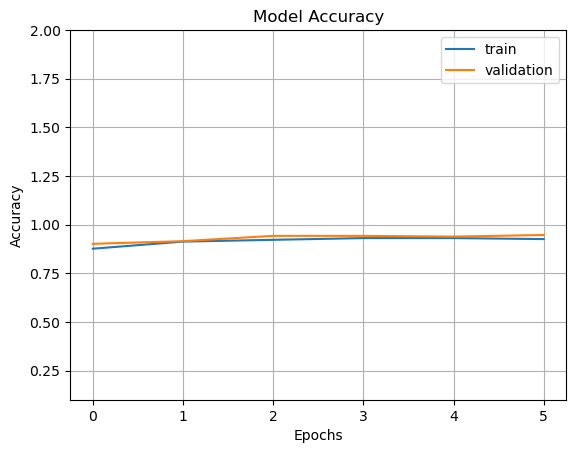

In [17]:
fig = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1,ymax=2)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

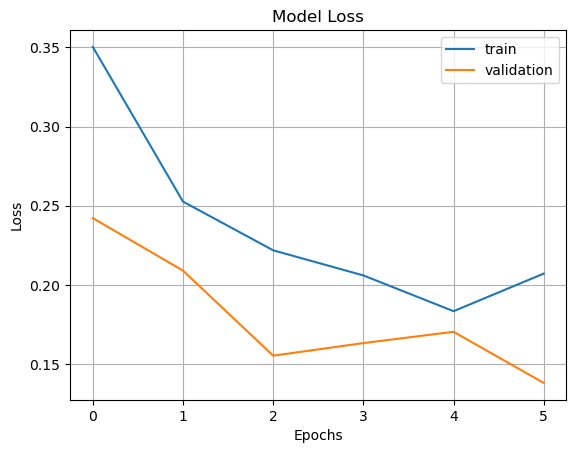

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [50]:
# import cv2
# def predict_image(model, image_path, class_names):
#     image = cv2.imread(image_path)
#     image_resized = cv2.resize(image, (img_height, img_width))
#     image = np.expand_dims(image_resized, axis=0)

#     pred = efficientnet_model.predict(image)
#     print(pred)
#     confidence_threshold = 0.6
#     if np.max(pred) < confidence_threshold:
#         return "unknown"
    
#     output_class = class_names[np.argmax(pred)]
#     return output_class

# image_path = '/Users/admin/Downloads/DSGP/bernese-mountain-dog.jpg'
# predicted_class = predict_image(efficientnet_model, image_path, class_names)

# print("The fruit is ", predicted_class)
def predict_image(model, image_path, class_names):
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (img_height, img_width))
    
    # Ensure the image is normalized to the range expected by EfficientNetB7
    image_resized = image_resized / 255.0
    
    image = np.expand_dims(image_resized, axis=0)

    pred = model.predict(image)
    print(pred)
    
    confidence_threshold = 0.55
    if np.max(pred) < confidence_threshold:
        return "unknown"
    
    output_class = class_names[np.argmax(pred)]
    return output_class

image_path = '/Users/admin/Downloads/DSGP/ripeban.jpeg'
predicted_class = predict_image(efficientnet_model, image_path, class_names)
print("The fruit is ", predicted_class)

1/1 [==============================] - 1s 538ms/step
[[0.00626151 0.03498023 0.95875823]]
The fruit is  Unripe
